### Ho Chi Minh City University of Science

#### 21KHDL - Ứng dụng Phân tích dữ liệu thông minh

#### Lecturers:

- Mr. Nguyễn Tiến Huy
- Mr. Nguyễn Trần Duy Minh

#### Student:

- 21127038 - Võ Phú Hãn


# Import & Data Loading


In [1]:
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Import the warnings module(Ignore all warnings)
# !pip install pycountry_convert
import pycountry_convert as pc
# !pip install plotly
import plotly.express as px
# !pip install seaborn --upgrade
import geopandas as gpd
import plotly.graph_objects as go


warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


# theme seaborn
sns.set_theme(
    style="whitegrid",
    palette=["#ffcc00", "#ffaa00", "#ff8800"],
    font="Arial",
    rc={
        "axes.edgecolor": "black",
        "grid.linestyle": "--",  # Lưới nét đứt
        "axes.labelcolor": "#5c5c5c",
        "xtick.color": "#6c757d",
        "ytick.color": "#6c757d",
        "axes.titlesize": 18,
        "axes.labelsize": 15,
        "xtick.labelsize": 13,
        "ytick.labelsize": 13,
        "legend.fontsize": 13,
    }
)
sns.set_context("notebook", font_scale=1)

# theme plotly
custom_template = pio.templates["custom_whitegrid"] = go.layout.Template(
    layout=go.Layout(
        template="plotly_white",
        font=dict(family="Arial", size=13),  # Font chung Arial
        title_font=dict(size=18, color="#5c5c5c"),  # Tiêu đề lớn
        xaxis=dict(
            showgrid=True,
            gridcolor="rgba(0, 0, 0, 0.2)",  # Lưới màu xám nhạt
            gridwidth=1,
            zeroline=False,
            tickfont=dict(size=13, color="#6c757d"),
            title_font=dict(size=15, color="#5c5c5c")
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor="rgba(0, 0, 0, 0.2)",  # Lưới màu xám nhạt
            gridwidth=1,
            zeroline=False,
            tickfont=dict(size=13, color="#6c757d"),
            title_font=dict(size=15, color="#5c5c5c")
        ),
        legend=dict(
            font=dict(size=13),
            bordercolor="black",
            borderwidth=1
        ),
        margin=dict(l=60, r=30, t=50, b=50)  # Lề xung quanh
    )
)

# Đặt template này làm mặc định cho toàn bộ Plotly
pio.templates.default = "custom_whitegrid"

In [2]:
raw_df = pd.read_csv("Billionaires Statistics Dataset.csv")
df = raw_df
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,1944.0,8.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,8/30/1930 0:00,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,1930.0,8.0,30.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [3]:
df.shape

(2640, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

## Ý nghĩa các cột dữ liệu

| **Cột**                                      | **Ý nghĩa**                                                                  |
| -------------------------------------------- | ---------------------------------------------------------------------------- |
| `rank`                                       | Thứ hạng của tỷ phú theo tài sản ròng.                                       |
| `finalWorth`                                 | Giá trị tài sản ròng của tỷ phú (triệu USD).                                 |
| `category`                                   | Ngành nghề chính mà tỷ phú hoạt động.                                        |
| `personName`                                 | Tên đầy đủ của tỷ phú.                                                       |
| `age`                                        | Tuổi của tỷ phú (tính đến thời điểm thu thập dữ liệu)                        |
| `country`                                    | Quốc gia nơi tỷ phú cư trú.                                                  |
| `city`                                       | Thành phố nơi tỷ phú cư trú.                                                 |
| `source`                                     | Nguồn tài sản của tỷ phú (ví dụ: công ty, tổ chức).                          |
| `industries`                                 | Các ngành nghề mà tỷ phú hoạt động.                                          |
| `countryOfCitizenship`                       | Quốc gia mà tỷ phú mang quốc tịch.                                           |
| `organization`                               | Tên tổ chức hoặc công ty liên quan đến tỷ phú.                               |
| `selfMade`                                   | Xác định liệu tỷ phú là tự thân lập nghiệp hay thừa kế tài sản (True/False). |
| `status`                                     | Trạng thái của tỷ phú: "D" cho tỷ phú tự thân, "U" cho tỷ phú thừa kế.       |
| `gender`                                     | Giới tính của tỷ phú (Nam/Nữ).                                               |
| `birthDate`                                  | Ngày sinh của tỷ phú.                                                        |
| `lastName`                                   | Họ của tỷ phú.                                                               |
| `firstName`                                  | Tên của tỷ phú.                                                              |
| `title`                                      | Danh hiệu hoặc vinh dự của tỷ phú (nếu có).                                  |
| `date`                                       | Ngày thu thập dữ liệu.                                                       |
| `state`                                      | Tiểu bang hoặc khu vực nơi tỷ phú cư trú (nếu có).                           |
| `residenceStateRegion`                       | Khu vực hoặc tiểu bang nơi tỷ phú cư trú.                                    |
| `birthYear`                                  | Năm sinh của tỷ phú.                                                         |
| `birthMonth`                                 | Tháng sinh của tỷ phú.                                                       |
| `birthDay`                                   | Ngày sinh của tỷ phú.                                                        |
| `cpi_country`                                | Chỉ số giá tiêu dùng (CPI) ở quốc gia của tỷ phú.                            |
| `cpi_change_country`                         | Tỷ lệ thay đổi CPI ở quốc gia của tỷ phú trong năm.                          |
| `gdp_country`                                | Tổng sản phẩm quốc nội (GDP) ở quốc gia của tỷ phú.                          |
| `gross_tertiary_education_enrollment`        | Tỷ lệ nhập học bậc đại học ở quốc gia của tỷ phú.                            |
| `gross_primary_education_enrollment_country` | Tỷ lệ nhập học tiểu học ở quốc gia của tỷ phú.                               |
| `life_expectancy_country`                    | Tuổi thọ trung bình ở quốc gia tỷ phú.                                       |
| `tax_revenue_country_country`                | Tổng thu thuế ở quốc gia của tỷ phú.                                         |
| `total_tax_rate_country`                     | Tổng tỷ lệ thuế ở quốc gia của tỷ phú.                                       |
| `population_country`                         | Dân số ở quốc gia của tỷ phú.                                                |
| `latitude_country`                           | Vĩ độ ở quốc gia của tỷ phú.                                                 |
| `longitude_country`                          | Kinh độ ở quốc gia của tỷ phú.                                               |


# Tiền xử lý dữ liệu


Hiển thị lượng missing ở các cột.


In [5]:
def missing_df(df):
    # Thống kê số lượng và tỷ lệ dữ liệu thiếu
    missing_data = df.isnull().sum()

    # Tính tỷ lệ dữ liệu thiếu cho từng cột
    missing_percentage = (missing_data / len(df)) * 100

    # Tạo bảng thống kê dữ liệu thiếu
    missing_summary = pd.DataFrame({
        'Missing Values': missing_data,
        'Missing Percentage (%)': missing_percentage
    })
    return missing_summary


missing_df(df)

,Missing Values,Missing Percentage (%)
rank,0,0.000000
finalWorth,0,0.000000
category,0,0.000000
personName,0,0.000000
age,65,2.462121
country,38,1.439394
city,72,2.727273
source,0,0.000000
industries,0,0.000000
countryOfCitizenship,0,0.000000


Xử lý missing ở "country", "city"


In [6]:
# df['country'].fillna(df['countryOfCitizenship'],
#                      inplace=True)  # điền bằng quốc tịch hiện tại
df['country'].fillna('Unknown',
                     inplace=True)
df['city'].fillna('Unknown', inplace=True)

Chuyển đổi kiểu dữ liệu cho phù hợp.


In [7]:
# Chuyển đổi cột 'gdp_country', 'finalWorth'  thành kiểu số (float)
df['gdp_country'] = df['gdp_country'].replace(
    '[\$,]', '', regex=True).astype(float)
df["finalWorth"] = df["finalWorth"].astype(float)

Điền các chỉ số bị thiếu bằng chỉ số trung bình của quốc gia, nếu không được thì châu lục.


In [8]:
def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(
            country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_map = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "SA": "South America",
            "OC": "Oceania"
        }
        return continent_map.get(continent_code, "Unknown")
    except Exception:
        return "Unknown"


# Đổi tên nước này cho match với thư viện 'pycountry_convert'
df[['country', 'countryOfCitizenship']] = df[['country',
                                              'countryOfCitizenship']].replace('Eswatini (Swaziland)', 'Eswatini')

# Áp dụng hàm để tạo cột 'continent'
# df['continent'] = df['countryOfCitizenship'].apply(get_continent)
df['continent'] = df['country'].apply(get_continent)

# Tính tuổi bằng cách lấy năm của 'date' trừ đi năm của 'birthDate'
df['birthDate'] = pd.to_datetime(df['birthDate'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['calculated_age'] = df['date'].dt.year - df['birthDate'].dt.year
df['age'].fillna(df['calculated_age'], inplace=True)

# mean_cols = ['cpi_country', 'cpi_change_country', 'total_tax_rate_country', 'tax_revenue_country_country', 'latitude_country',
#              'longitude_country', 'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country']
# median_cols = ['age', 'gdp_country',
#                'life_expectancy_country', 'population_country']
del_cols = ['cpi_country', 'cpi_change_country', 'total_tax_rate_country', 'tax_revenue_country_country',
            'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country', 'gdp_country',
            'life_expectancy_country', 'population_country']

mean_cols = ['latitude_country', 'longitude_country']
median_cols = ['age']

# Điền giá trị thiếu bằng trung bình theo quốc gia
for col in mean_cols:
    df[col] = df.groupby('country')[col].transform(
        lambda x: x.fillna(x.mean()))

# Điền giá trị thiếu bằng trung vị theo quốc gia
for col in median_cols:
    df[col] = df.groupby('country')[col].transform(
        lambda x: x.fillna(x.median()))

# Điền giá trị thiếu bằng trung bình theo châu lục
for col in mean_cols:
    df[col] = df.groupby('continent')[col].transform(
        lambda x: x.fillna(x.mean()))

# Điền giá trị thiếu bằng trung vị theo châu lục
for col in median_cols:
    df[col] = df.groupby('continent')[col].transform(
        lambda x: x.fillna(x.median()))

df['calculated_birthYear'] = df['date'].dt.year - df['age']
df['birthYear'].fillna(df['calculated_birthYear'], inplace=True)

missing_df(df)

,Missing Values,Missing Percentage (%)
rank,0,0.000000
finalWorth,0,0.000000
category,0,0.000000
personName,0,0.000000
age,0,0.000000
country,0,0.000000
city,0,0.000000
source,0,0.000000
industries,0,0.000000
countryOfCitizenship,0,0.000000


Loại bỏ một số cột:

- Không cần thiết: cột chứa dữ liệu trùng lập ('category' và 'industries'), các cột tên, họ, ngày sinh, ngày thu thập dữ liệu.
- Có Missing Percentage lớn hơn 50%: 'organization', 'title', 'state', 'residenceStateRegion'.
- Cột có thông tin không rõ ràng: 'status'


In [9]:
df['age'] = np.floor(pd.to_numeric(df['age'], errors='coerce')).astype('int64')
df['birthYear'] = np.floor(pd.to_numeric(
    df['birthYear'], errors='coerce')).astype('int64')

df.drop(columns=['organization', 'title', 'state', 'residenceStateRegion', 'status', 'calculated_age', 'calculated_birthYear',
                 'lastName', 'firstName', 'date', 'birthMonth', 'birthDay', 'birthDate']+del_cols, inplace=True)
missing_df(df)

,Missing Values,Missing Percentage (%)
rank,0,0.000000
finalWorth,0,0.000000
category,0,0.000000
personName,0,0.000000
age,0,0.000000
country,0,0.000000
city,0,0.000000
source,0,0.000000
industries,0,0.000000
countryOfCitizenship,0,0.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2640 non-null   int64  
 1   finalWorth            2640 non-null   float64
 2   category              2640 non-null   object 
 3   personName            2640 non-null   object 
 4   age                   2640 non-null   int64  
 5   country               2640 non-null   object 
 6   city                  2640 non-null   object 
 7   source                2640 non-null   object 
 8   industries            2640 non-null   object 
 9   countryOfCitizenship  2640 non-null   object 
 10  selfMade              2640 non-null   bool   
 11  gender                2640 non-null   object 
 12  birthYear             2640 non-null   int64  
 13  latitude_country      2602 non-null   float64
 14  longitude_country     2602 non-null   float64
 15  continent            

In [11]:
df.to_csv('cleaned_data.csv', index=False)

# Câu hỏi phân tích


## 1. Các câu hỏi về sự phân bố tài sản theo các yếu tố cá nhân


### **Câu hỏi:** Tuổi tác có ảnh hưởng đến mức độ giàu có của một tỷ phú không?


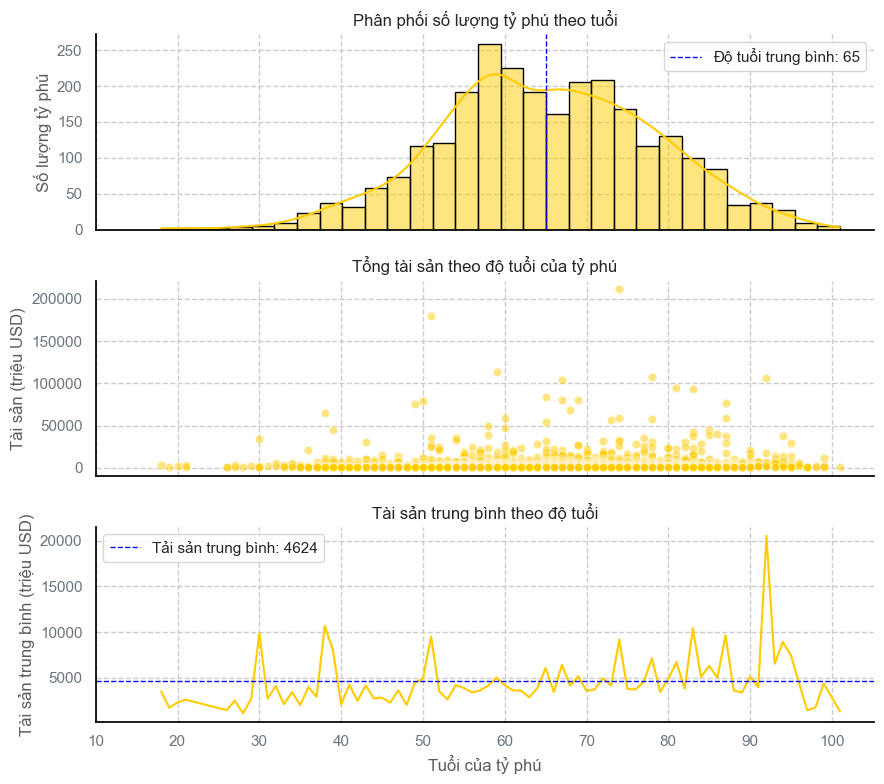

Tỉ phú trẻ tuổi nhất: 18 tuổi


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,selfMade,gender,birthYear,latitude_country,longitude_country,continent
823,818,3500.0,Fashion & Retail,Clemente Del Vecchio,18,Italy,Milan,Eyeglases,Fashion & Retail,Italy,False,M,2004,41.87194,12.56738,Europe


Tỉ phú lớn tuổi nhất: 101 tuổi


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,selfMade,gender,birthYear,latitude_country,longitude_country,continent
2180,2133,1300.0,Finance & Investments,George Joseph,101,United States,Los Angeles,Insurance,Finance & Investments,United States,True,M,1921,37.09024,-95.712891,North America


In [12]:

# Tính toán giá trị trung vị và trung bình
mean_age = df['age'].mean()
mean_wealth = df['finalWorth'].mean()

# Thiết lập kích thước chung
fig, axes = plt.subplots(3, figsize=(9, 8), sharex=True)

# Biểu đồ 1: Phân phối số lượng tỷ phú theo tuổi
sns.histplot(df['age'], bins=30, kde=True, edgecolor="black", ax=axes[0])
axes[0].axvline(mean_age, color='blue', linestyle='dashed',
                linewidth=1, label=f'Độ tuổi trung bình: {mean_age:.0f}')
axes[0].set_xlabel("Tuổi của tỷ phú")
axes[0].set_ylabel("Số lượng tỷ phú")
axes[0].set_title("Phân phối số lượng tỷ phú theo tuổi")
axes[0].legend()
sns.despine(ax=axes[0])

# Biểu đồ 2: Tổng tài sản theo độ tuổi
sns.scatterplot(x=df['age'], y=df['finalWorth'], alpha=0.5, ax=axes[1])
axes[1].set_xlabel("Tuổi của tỷ phú")
axes[1].set_ylabel("Tài sản (triệu USD)")
axes[1].set_title("Tổng tài sản theo độ tuổi của tỷ phú")
sns.despine(ax=axes[1])

# Biểu đồ 3: Tài sản trung bình theo độ tuổi
sns.lineplot(data=df, x='age', y='finalWorth', ax=axes[2], ci=False)
axes[2].axhline(mean_wealth, color='blue', linestyle='dashed',
                linewidth=1, label=f'Tải sản trung bình: {mean_wealth:.0f}')
axes[2].set_xlabel("Tuổi của tỷ phú")
axes[2].set_ylabel("Tài sản trung bình (triệu USD)")
axes[2].set_title("Tài sản trung bình theo độ tuổi")
axes[2].legend()
plt.xticks(np.arange(10, df["age"].max() + 1, 10))

sns.move_legend(axes[2], "upper left")
sns.despine(ax=axes[2])

# Hiển thị toàn bộ biểu đồ
plt.tight_layout()
plt.show()

# Find the youngest and oldest billionaires
youngest_billionaire = df[df['age'] == df['age'].min()]
oldest_billionaire = df[df['age'] == df['age'].max()]
print(f'Tỉ phú trẻ tuổi nhất: {int(youngest_billionaire["age"])} tuổi')
display(youngest_billionaire)
print(f'Tỉ phú lớn tuổi nhất: {int(oldest_billionaire["age"])} tuổi')
display(oldest_billionaire)

**Nhận xét:**

- **Số lượng tỷ phú tập trung chủ yếu trong độ tuổi 50-75**, trải dài từ **18** đến **101** tuổi, với độ tuổi trung bình khoảng **65**.
- **Tổng tài sản phân tán mạnh**, với một số tỷ phú sở hữu lượng tài sản cực kỳ lớn, gây ra sự chênh lệch đáng kể.
- **Tài sản trung bình có nhiều biến động**, không tăng đều theo độ tuổi mà xuất hiện nhiều đỉnh bất thường, có thể do ảnh hưởng của các tỷ phú siêu giàu. Như ở độ tuổi 30 và hơn 90, do số lượng tỉ phú ở độ tuổi này không nhiều, nên chỉ với 1 tỉ phú với lượng tài sản vượt trội đã có thể kéo tải sản trung bình ở độ tuổi này lên gấp nhiều lần.

**Insight:**

- **Độ tuổi trung bình của các tỷ phú là 65**, phần lớn tập trung trong khoảng 50-75 tuổi.
- **Tài sản trung bình không tăng đều theo độ tuổi**, có nhiều biến động lớn do ảnh hưởng của các tỷ phú siêu giàu.
- **Một số tỷ phú trẻ tuổi sở hữu tài sản cực lớn**, chủ yếu trong lĩnh vực công nghệ hoặc thừa kế tài sản.


#### **Giả thuyết:** Phần lớn tỉ phú dưới 30 tuổi là tỉ phú thừa kế.


In [13]:
age_self_made_counts = df.groupby(
    ['age', 'selfMade']).size().unstack(fill_value=0)

age_self_made_counts_reset = age_self_made_counts.reset_index()
age_self_made_counts_melted = age_self_made_counts_reset.melt(
    id_vars=['age'], var_name='selfMade', value_name='Count')

# Vẽ biểu đồ với Plotly
fig = px.line(
    age_self_made_counts_melted,
    x='age',
    y='Count',
    color='selfMade',
    markers=True,
    labels={'age': 'Tuổi của tỷ phú',
            'Count': 'Số lượng tỷ phú', 'selfMade': 'Tự thân'},
    title="Số lượng tỷ phú tự thân và thừa kế theo độ tuổi"
)

# Hiển thị biểu đồ
fig.show()

**Nhận xét:**

- **Phần lớn các tỉ phú trong dataset là tỉ phú tự thân**.
- **Phần lớn tỷ phú dưới 30 tuổi là tỷ phú thừa kế** với tỷ lệ **10/11**. **Nguyên nhân có thể do việc tích lũy tài sản lớn từ con số 0 thường mất nhiều thời gian**, trong khi những người thừa kế có thể sở hữu tài sản ngay từ khi còn rất trẻ.
- Khi nhìn tổng thể, tỷ phú tự thân chiếm ưu thế ở các nhóm tuổi cao hơn, nhưng gần như **không xuất hiện ở độ tuổi rất trẻ**.
- Đỉnh của các tỉ phú tự thân lệch về bên trái một chút so với các tỉ phú thừa kế, nên có thể suy ra **các tỷ phú tự thân có xu hướng trẻ hơn tỷ phú thừa kế**.

**Insight:**

- Các tỉ phú tự thân và thừa kế xuất hiện ở hầu khắp các độ tuổi và các tỉ phú tự thân chiếm đa số.
- Phần lớn các tỉ phú siêu trẻ (dưới 30 tuổi) không phải là tỉ phú tự thân.


### **Câu hỏi:** Sự phân bố tỷ phú theo thế hệ và giới tính thay đổi như thế nào?


In [14]:
# Danh sách các thế hệ và khoảng năm sinh tương ứng
generation_ranges = {
    "Greatest Generation": (1921, 1927),
    "Silent Generation": (1928, 1945),
    "Baby Boomers": (1946, 1964),
    "Gen X": (1965, 1980),
    "Millennials (Gen Y)": (1981, 1996),
    "Gen Z": (1997, 2012),
}


def classify_generation(year):
    for generation, (start, end) in generation_ranges.items():
        if start <= year <= end:
            return generation
    return "Unknown"


df["generation"] = df["birthYear"].apply(classify_generation)

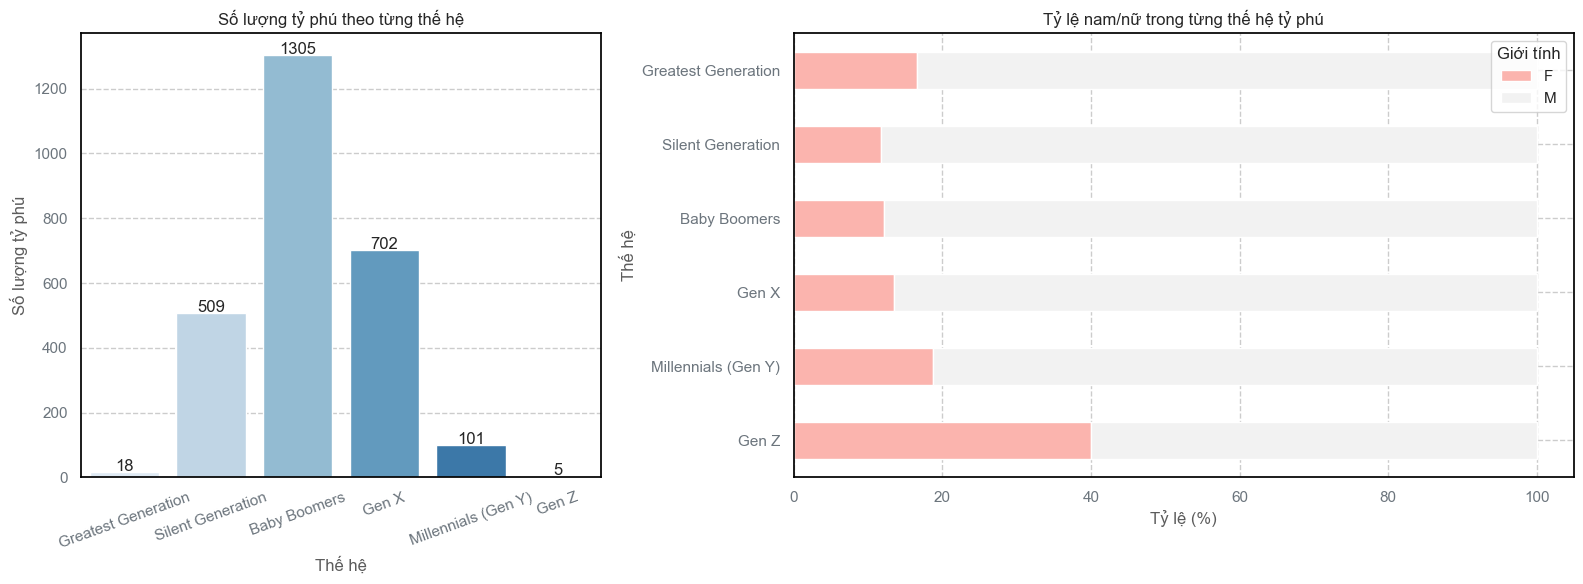

In [15]:
# Đếm số lượng tỷ phú theo thế hệ
generation_counts = df["generation"].value_counts().reindex(
    generation_ranges.keys(), fill_value=0)
# Đếm số lượng tỷ phú theo giới tính trong từng thế hệ
gender_gen_counts = df.groupby(
    ["generation", "gender"]).size().unstack(fill_value=0)

gender_gen_counts = gender_gen_counts.reindex(
    list(generation_ranges.keys()), fill_value=0)

# Chuẩn hóa về phần trăm trong mỗi thế hệ
gender_gen_percentage = gender_gen_counts.div(
    gender_gen_counts.sum(axis=1), axis=0) * 100


fig, axes = plt.subplots(1, 2, figsize=(
    16, 6), gridspec_kw={'width_ratios': [4, 6]})

ax1 = axes[0]
sns.barplot(y=generation_counts.values,
            x=generation_counts.index, palette="Blues", ax=ax1)
for index, value in enumerate(generation_counts.values):
    ax1.text(index, value + 2, str(value), ha="center", fontsize=12)

ax1.set_xlabel("Thế hệ")
ax1.set_ylabel("Số lượng tỷ phú")
ax1.set_title("Số lượng tỷ phú theo từng thế hệ")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20,
                    ha="center")

ax2 = axes[1]
gender_gen_percentage.plot(kind="barh", stacked=True,
                           colormap="Pastel1",  ax=ax2)

ax2.set_xlabel("Tỷ lệ (%)")
ax2.set_ylabel("Thế hệ")
ax2.set_title("Tỷ lệ nam/nữ trong từng thế hệ tỷ phú")
ax2.legend(title="Giới tính", loc="upper right")
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

**Nhận xét:**

- **Tỷ lệ nữ ở Greatest Generation cao hơn nam, có khả năng là do nữ giới sống thọ hơn nên vẫn còn nhiều nữ tỷ phú ở thế hệ này.**
- **Tỷ lệ nữ trong từng thế hệ có xu hướng tăng nhẹ**, đặc biệt tăng mạnh nhất ở **Gen Y**.
- **Nam giới vẫn chiếm tỷ lệ áp đảo trong tất cả các thế hệ**, đặc biệt là ở thế hệ lớn tuổi hơn.
- Thế hệ Gen Z chưa có nhiều tỷ phú nên thống kê không có nhiều ý nghĩa.

**Insight:**

- **Baby Boomers là thế hệ có số lượng tỷ phú nhiều nhất**, chiếm gần 50% số lượng tỷ phú.
- **Tỷ lệ nữ ở Greatest Generation khá cao, có khả năng là do nữ giới sống thọ hơn nên vẫn còn nhiều nữ tỷ phú ở thế hệ này.**
- **Tỷ lệ nữ trong các thế hệ sau có xu hướng cao hơn các thế hệ trước. Millennials (Gen Y) có tỷ lệ nữ cao nhất** trong tất cả các thế hệ.


### **Câu hỏi:** Đâu là điểm khác biệt giữa tỉ phú nam và tỉ phú nữ?


In [16]:
# gender_selfmade_counts = df.pivot_table(index="gender", columns="selfMade", aggfunc="size", fill_value=0)

# # Vẽ heatmap
# plt.figure(figsize=(9, 5))
# sns.heatmap(gender_selfmade_counts, annot=True, fmt="d", cmap="Blues")

# # Thêm tiêu đề và nhãn
# plt.title("Heatmap: Mối quan hệ giữa Giới tính và Self-Made Status", fontsize=14)
# plt.xlabel("Self-Made Status")
# plt.ylabel("Gender")

# # Hiển thị biểu đồ
# plt.show()

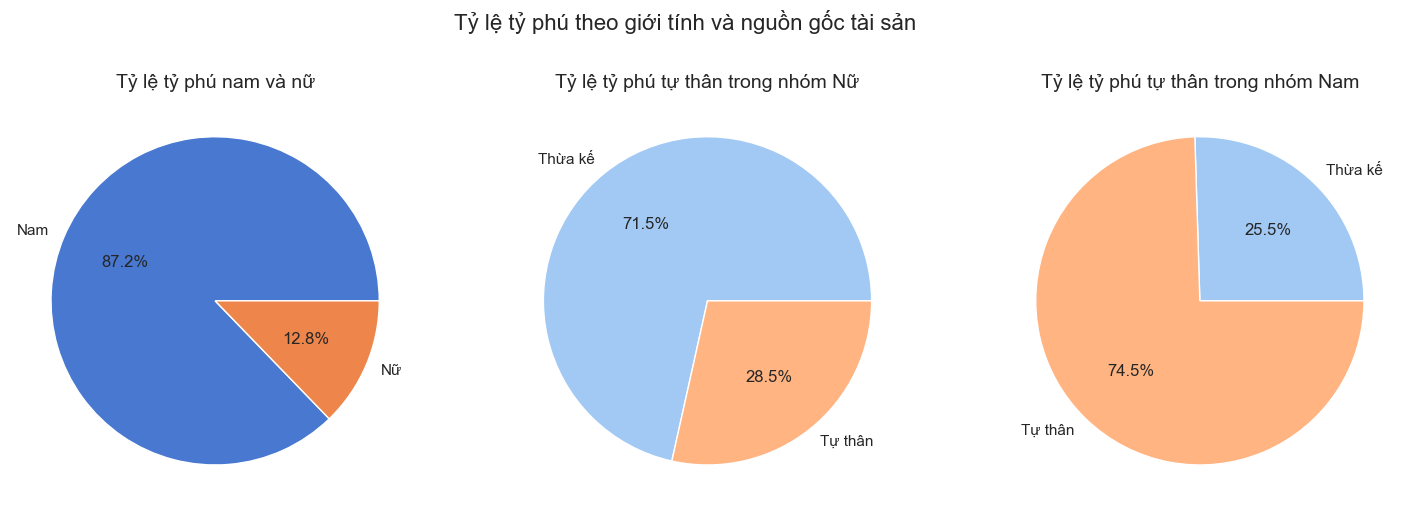

In [17]:
# Tính tỷ lệ tỷ phú tự thân ở nam và nữ
self_made_gender = df.groupby("gender")["selfMade"].value_counts(
    normalize=True).unstack() * 100

# Tính tỷ lệ nam và nữ
gender_distribution = df["gender"].value_counts(normalize=True) * 100

sns.set_theme(style="whitegrid")

# Tạo figure và subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Màu sắc cho biểu đồ
colors_selfmade = sns.color_palette("pastel")
colors_gender = sns.color_palette("muted")

# Biểu đồ tròn tổng thể - Tỷ lệ nam và nữ
axes[0].pie(gender_distribution, labels=["Nam", "Nữ"],
            autopct="%1.1f%%", colors=colors_gender)
axes[0].set_title("Tỷ lệ tỷ phú nam và nữ", fontsize=14)


# Biểu đồ tròn cho nữ - Tỷ lệ tự thân và thừa kế
axes[1].pie(self_made_gender.loc["F"], labels=["Thừa kế", "Tự thân"],
            autopct="%1.1f%%", colors=colors_selfmade)
axes[1].set_title("Tỷ lệ tỷ phú tự thân trong nhóm Nữ", fontsize=14)

# Biểu đồ tròn cho nam - Tỷ lệ tự thân và thừa kế
axes[2].pie(self_made_gender.loc["M"], labels=["Thừa kế", "Tự thân"],
            autopct="%1.1f%%", colors=colors_selfmade)
axes[2].set_title("Tỷ lệ tỷ phú tự thân trong nhóm Nam", fontsize=14)


# Tiêu đề chung
plt.suptitle("Tỷ lệ tỷ phú theo giới tính và nguồn gốc tài sản", fontsize=16)
plt.show()

**Nhận xét:**

- **Tỷ lệ tỷ phú nam áp đảo so với nữ**, với **87.2% là nam** và chỉ **12.8% là nữ**. Điều này cho thấy sự chênh lệch đáng kể về số lượng tỷ phú theo giới tính.
- **Phần lớn tỷ phú nữ là thừa kế tài sản (71.5%)**, chỉ có **28.5% là tự thân**. **Ngược lại, tỷ phú nam có tỷ lệ tự thân rất cao (74.5%)**, trong khi chỉ **25.5% là thừa kế**.
- **Chênh lệch về giới tính trong nhóm tỷ phú có thể liên quan đến lịch sử kinh tế - xã hội**, trong đó nam giới có nhiều cơ hội hơn để xây dựng sự nghiệp và tích lũy tài sản.

**Insight:**

- **Tỷ lệ tỷ phú nam áp đảo so với nữ.**
- **Tỷ phú nữ chủ yếu là do thừa kế, nam tỷ phú phần lớn là tự thân.**sinh lợi cao.


<Figure size 1400x800 with 0 Axes>

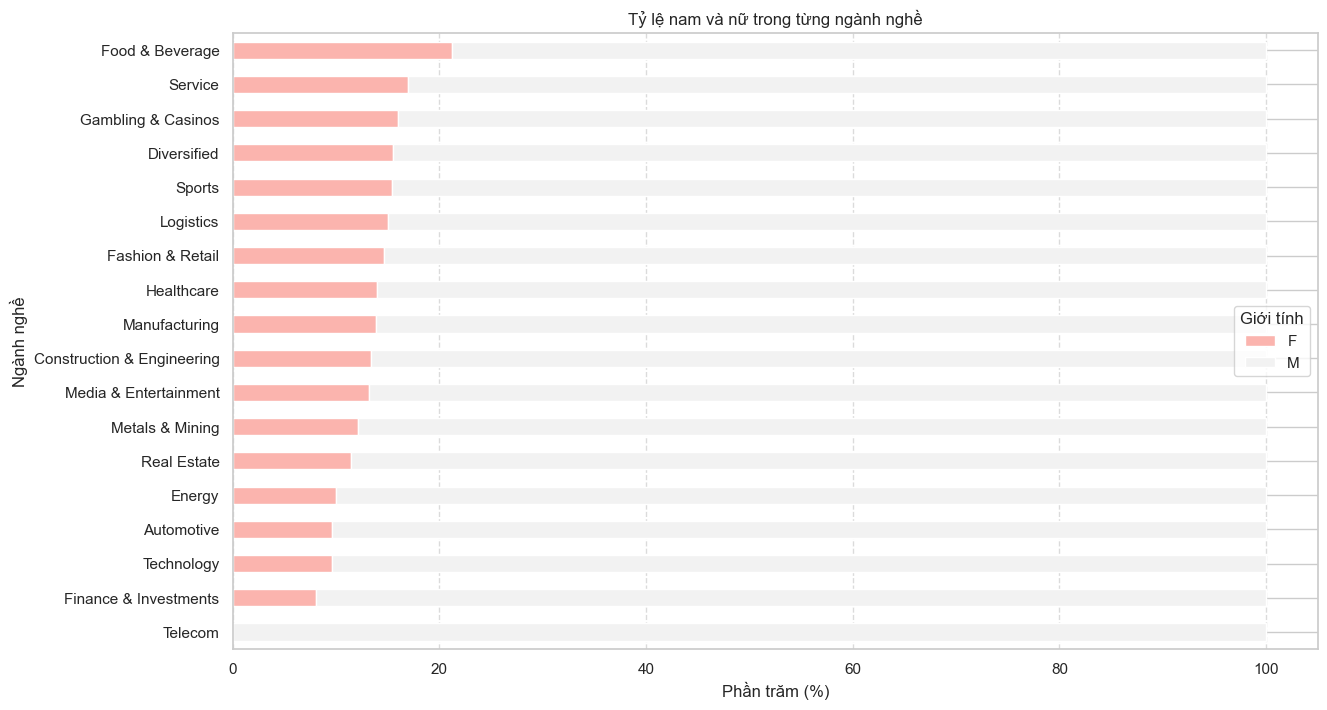

In [18]:
# Tính phần trăm tỷ phú nam và nữ trong mỗi ngành nghề
gender_distribution = df.groupby(
    ["industries", "gender"]).size().unstack(fill_value=0)
gender_distribution_percent = gender_distribution.div(
    gender_distribution.sum(axis=1), axis=0) * 100
gender_distribution_percent.sort_values("F", ascending=True, inplace=True)

# Vẽ biểu đồ cột phân tích phần trăm nam nữ trong mỗi ngành
plt.figure(figsize=(14, 8))
gender_distribution_percent.plot(
    kind="barh", stacked=True, colormap="Pastel1", figsize=(14, 8))

plt.ylabel("Ngành nghề")
plt.xlabel("Phần trăm (%)")
plt.title("Tỷ lệ nam và nữ trong từng ngành nghề")
plt.legend(title="Giới tính")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

**Nhận xét:**

- **Nam giới vẫn chiếm đa số trong tất cả các ngành nghề**, với tỷ lệ vượt trội hơn hẳn nữ giới trong phần lớn các lĩnh vực.
- **Tỷ lệ nữ tỷ phú trong các ngành đều khá đồng đều và thường trên 10%**, không có ngành nào hoàn toàn vắng mặt nữ giới.
- **Các ngành có tỷ lệ nữ cao nhất**, bao gồm **thực phẩm & đồ uống (Food & Beverage), dịch vụ (Service), và casino cá cược (Gambling & Casinos)**.
- **Mặc dù tỷ lệ tỷ phú nữ vẫn thấp, nhưng họ đã xuất hiện trong hầu hết các ngành nghề**, điều này cho thấy cơ hội kinh doanh và làm giàu đang ngày càng mở rộng cho phụ nữ, chứ không chỉ tập trung vào các ngành nữ tính như thời trang làm đẹp.

**Insight:**

- **Tỷ lệ nữ tỷ phú trên 10% ở nhiều ngành có thể là dấu hiệu cho thấy sự gia tăng của nữ doanh nhân, phản ánh xu hướng bình đẳng hơn trong việc tiếp cận tài sản và cơ hội kinh doanh**. Tuy nhiên, các ngành top của các tỉ phú nữ vẫn là các ngành truyền thống và cần sự tích luỹ lâu dài như về **thực phẩm & đồ uống (Food & Beverage), dịch vụ (Service), và casino cá cược (Gambling & Casinos)**.
- **Sự phân bố đồng đều của nữ tỷ phú giữa các ngành có thể là bằng chứng cho thấy họ không còn bị giới hạn trong một số ngành truyền thống mà có thể thành công trong mọi lĩnh vực**.


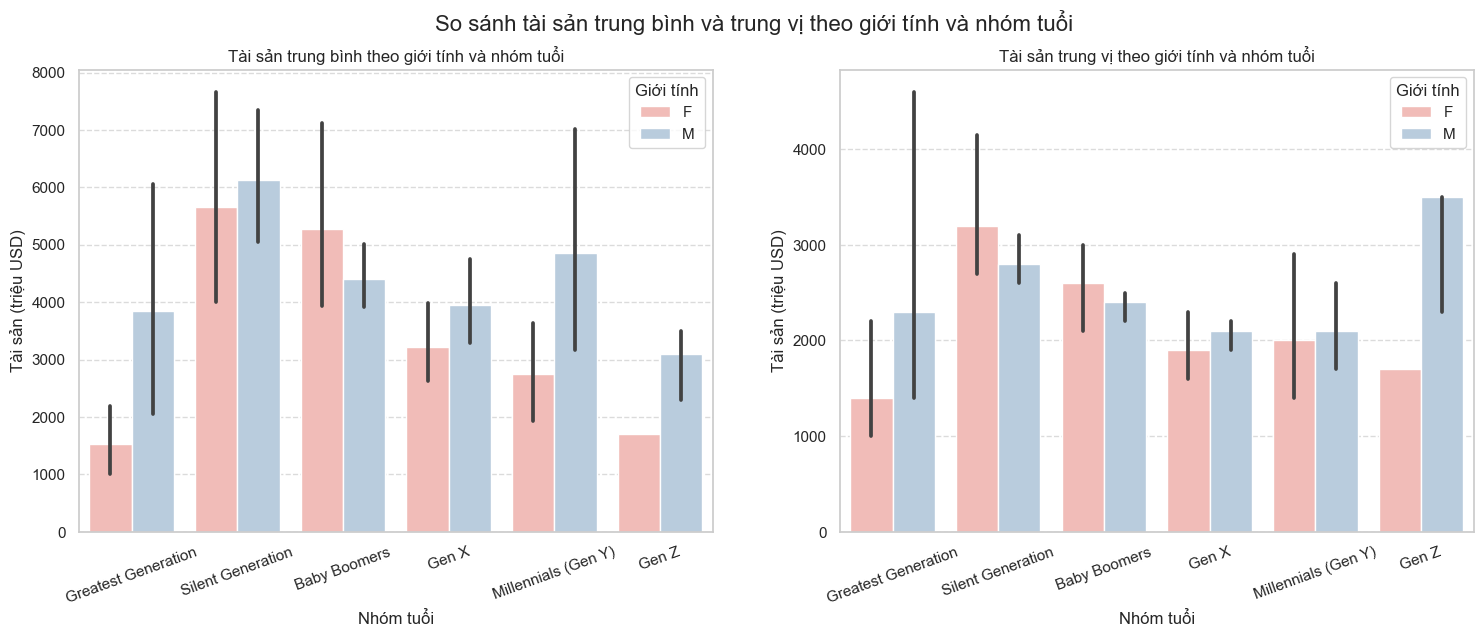

In [19]:
# Tạo figure với 2 subplot ngang
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Biểu đồ tài sản trung bình
sns.barplot(data=df, x="generation", y="finalWorth", hue="gender",
            estimator=np.mean, palette="Pastel1", ax=axes[0], hue_order=["F", "M"], order=generation_ranges.keys())
axes[0].set_title("Tài sản trung bình theo giới tính và nhóm tuổi")
axes[0].set_xlabel("Nhóm tuổi")
axes[0].set_ylabel("Tài sản (triệu USD)")
axes[0].legend(title="Giới tính")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=20,
                        ha="center")  # Xoay 45 độ, căn phải

# Biểu đồ tài sản trung vị
sns.barplot(data=df, x="generation", y="finalWorth", hue="gender",
            estimator=np.median, palette="Pastel1", ax=axes[1], hue_order=["F", "M"], order=generation_ranges.keys())
axes[1].set_title("Tài sản trung vị theo giới tính và nhóm tuổi")
axes[1].set_xlabel("Nhóm tuổi")
axes[1].set_ylabel("Tài sản (triệu USD)")
axes[1].legend(title="Giới tính")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=20,
                        ha="center")  # Xoay 45 độ, căn phải

# Tiêu đề chung
plt.suptitle(
    "So sánh tài sản trung bình và trung vị theo giới tính và nhóm tuổi", fontsize=16)
plt.show()

**Nhận xét:**

- **Tài sản trung bình:**

  - Nam giới có tài sản trung bình cao hơn nữ giới trong hầu hết các nhóm tuổi, ngoại trừ **Baby Boomers**.
  - **Gen X và Millennials (Gen Y) có mức chênh lệch lớn giữa nam và nữ**, với nam giới sở hữu tài sản trung bình cao hơn đáng kể.
  - **Số liệu Gen Z và Greatest Generation không có ý nghĩa thống kê** do số lượng tỷ phú ít, nhưng nam giới vẫn có lợi thế rõ ràng.

- **Tài sản trung vị:**
  - Tương tự tài sản trung bình, nam giới có **tài sản trung vị cao hơn nữ** trong hầu hết các nhóm tuổi, **trừ 2 Silent Generation và Baby Boomers.**
  - **Millennials (Gen Y) có xu hướng cân bằng hơn giữa nam và nữ**.

**Insight:**

- **Nam giới có tài sản trung bình và trung vị cao hơn nữ giới trong hầu hết các thế hệ.**
- **Silent Generation là nhóm duy nhất có sự cân bằng hơn giữa hai giới.**


### **Câu hỏi:** Tỷ phú tự thân và thừa kế có sự khác biệt đáng kể hay không (về tài sản trung bình và số lượng tỷ phú)?


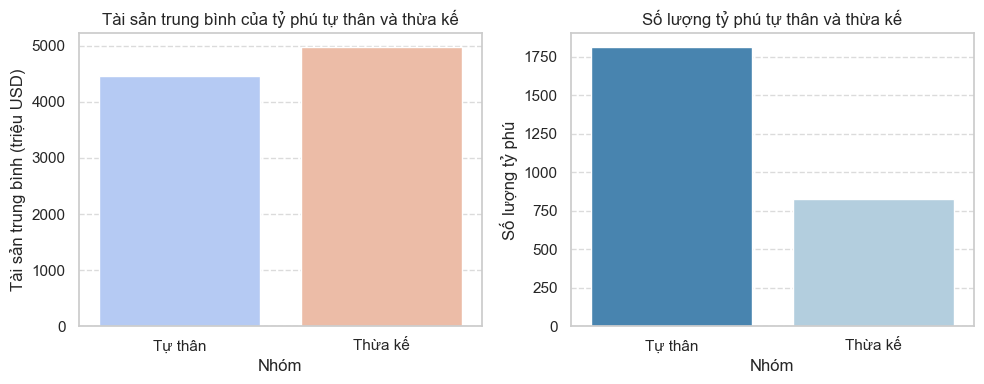

In [20]:

# Phân tách dữ liệu theo nhóm tự thân và thừa kế
self_made_wealth = df[df["selfMade"]]["finalWorth"]
inherited_wealth = df[~df["selfMade"]]["finalWorth"]

# Tính tài sản trung bình của mỗi nhóm
avg_self_made = self_made_wealth.mean()
avg_inherited = inherited_wealth.mean()

# Đếm số lượng tỷ phú trong mỗi nhóm
count_self_made = len(self_made_wealth)
count_inherited = len(inherited_wealth)

wealth_comparison = pd.DataFrame({
    "Nhóm": ["Tự thân", "Thừa kế"],
    "Tài sản trung bình (triệu USD)": [avg_self_made, avg_inherited],
    "Số lượng tỷ phú": [count_self_made, count_inherited]
})

# Thiết lập figure và subplots
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

# Biểu đồ 1: Tài sản trung bình của tỷ phú tự thân và thừa kế
sns.barplot(x=wealth_comparison["Nhóm"], y=wealth_comparison["Tài sản trung bình (triệu USD)"],
            palette="coolwarm", ax=axes[0])
axes[0].set_title("Tài sản trung bình của tỷ phú tự thân và thừa kế")
axes[0].set_xlabel("Nhóm")
axes[0].set_ylabel("Tài sản trung bình (triệu USD)")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Biểu đồ 2: Số lượng tỷ phú tự thân và thừa kế
sns.barplot(x=wealth_comparison["Nhóm"], y=wealth_comparison["Số lượng tỷ phú"],
            palette="Blues_r", ax=axes[1])
axes[1].set_title("Số lượng tỷ phú tự thân và thừa kế")
axes[1].set_xlabel("Nhóm")
axes[1].set_ylabel("Số lượng tỷ phú")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét:**

- **Số lượng tỷ phú tự thân cao hơn đáng kể so với tỷ phú thừa kế**, cho thấy phần lớn tỷ phú trong danh sách đã tự tạo dựng tài sản của họ thay vì thừa kế.
- **Tài sản trung bình của tỷ phú thừa kế cao hơn so với tỷ phú tự thân**, điều này có thể là do các tài sản được thừa kế đã có sự tích lũy qua nhiều thế hệ, trong khi tỷ phú tự thân phải xây dựng tài sản từ đầu.
- Tuy tài sản trung bình của tỷ phú tự thân **thấp hơn một chút** so với tỷ phú thừa kế, nhưng do lượng tỉ phú tự thân lớn gấp đôi tỷ phú thừa kế, **tổng tài sản của tỷ phú tự thân sẽ lớn hơn tỷ phú thừa kế**.

**Insight:**

- **Tỷ phú tự thân chiếm đa số nhưng tài sản trung bình không cao bằng tỷ phú thừa kế.**
- **Thừa kế giúp duy trì khối tài sản lớn hơn, trong khi tự thân tạo ra số lượng tỷ phú nhiều hơn.**


### **Câu hỏi:** Tài sản của các tỷ phú có phân bố đồng đều hay tập trung vào một nhóm nhỏ?


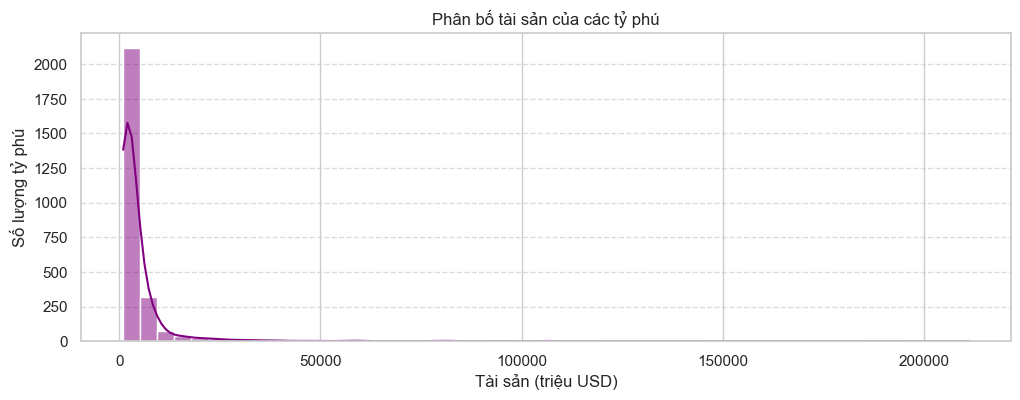

In [21]:
# Vẽ biểu đồ phân bố tài sản
plt.figure(figsize=(12, 4))
sns.histplot(df["finalWorth"], bins=50, kde=True, color="purple")

plt.xlabel("Tài sản (triệu USD)")
plt.ylabel("Số lượng tỷ phú")
plt.title("Phân bố tài sản của các tỷ phú")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**Nhận xét:**

- **Phân phối tài sản của các tỷ phú có độ lệch phải rất cao**, nghĩa là phần lớn tỷ phú sở hữu tài sản ở mức thấp hơn so với một số ít cá nhân siêu giàu.
- **Phần lớn tỷ phú có tài sản dưới 10 tỷ USD**, chỉ một số rất ít nằm trong nhóm siêu giàu với tài sản trên 100 tỷ triệu USD.
- **Sự chênh lệch này có thể do tài sản của các tỷ phú công nghệ và đầu tư tài chính có tốc độ tăng trưởng cao**, dẫn đến sự tập trung tài sản mạnh vào một nhóm nhỏ.

**Insight:**

- **Tài sản của tỷ phú không phân bố đều, mà có độ lệch phải cao**.
- **Phần lớn tỷ phú có tài sản dưới 10 tỷ USD, trong khi một nhóm rất nhỏ nắm giữ tài sản cực lớn**.


#### **Giả thuyết:** Top 1% tỷ phú giàu nhất nắm giữ hơn 50% tổng tài sản.


In [22]:
# Tính tổng tài sản của tất cả tỷ phú
total_wealth = df["finalWorth"].sum()

# Xác định top 1% tỷ phú giàu nhất
top_1_percent_threshold = np.percentile(df["finalWorth"], 99)
top_1_percent_wealth = df[df["finalWorth"] >=
                          top_1_percent_threshold]["finalWorth"].sum()

# Tính tỷ lệ tài sản của top 1% so với toàn bộ tài sản (làm tròn 2 chữ số)
top_1_percent_ratio = round((top_1_percent_wealth / total_wealth) * 100, 2)

print(
    f"Top 1% tỉ phú giàu nhất nắm giữ {top_1_percent_ratio}% tổng lượng tài sản của các tỉ phú.")

Top 1% tỉ phú giàu nhất nắm giữ 17.98% tổng lượng tài sản của các tỉ phú.


**Nhận xét:**

- **Top 1% tỷ phú giàu nhất nắm giữ 17.98% tổng tài sản của toàn bộ tỷ phú**, thấp hơn so với giả thuyết ban đầu rằng họ sẽ kiểm soát hơn 50%. Điều này cho thấy tài sản không tập trung quá mức vào nhóm siêu giàu nhất.
- **Mặc dù chỉ chiếm 1% tổng số tỷ phú, họ vẫn kiểm soát gần 1/5 tổng tài sản**, cho thấy sự bất bình đẳng vẫn tồn tại nhưng không quá cực đoan.


#### **Câu hỏi:** Các tỉ phú top đầu nắm giữ bao nhiêu phần trăm tổng tài sản của toàn bộ tỉ phú?


In [23]:
import pandas as pd

# Sắp xếp danh sách tỷ phú theo tài sản giảm dần
df_sorted = df.sort_values(by="finalWorth", ascending=False)

# Tính tổng tài sản của tất cả tỷ phú
total_wealth = df["finalWorth"].sum()

# Các nhóm tỷ phú cần tính
percentiles = [1, 10, 50]
results = []

# Tính tổng tài sản của top X% tỷ phú giàu nhất
num_billionaires = len(df)
for p in percentiles:
    top_n = int(num_billionaires * (p / 100))
    top_wealth = df_sorted["finalWorth"].iloc[:top_n].sum()
    wealth_percentage = round((top_wealth / total_wealth) * 100, 2)
    results.append([p, top_n, wealth_percentage])

# Chuyển thành DataFrame
wealth_concentration = pd.DataFrame(
    results, columns=["% Top tỷ phú", "Số tỷ phú", "% Tổng tài sản nắm giữ"])
wealth_concentration

,% Top tỷ phú,Số tỷ phú,% Tổng tài sản nắm giữ
0,1,26,17.63
1,10,264,47.57
2,50,1320,83.32


**Insight:**

- **Top 10% tỉ phú giàu nhất** nắm giữ **hơn 47% tổng tài sản của các tỉ phú.**
- **Top 50% tỉ phú giàu nhất** nắm giữ **hơn 83% tổng tài sản của các tỉ phú.**


## 2. Các câu hỏi về sự phân bố tài sản của các ngành nghề


### **Câu hỏi:** Ngành nghề nào sản sinh ra nhiều tỷ phú nhất? Ngành nào tạo ra những tỷ phú giàu nhất?


In [24]:
# Tính số lượng tỷ phú theo ngành
industry_counts = df["industries"].value_counts()

# Tính tài sản trung bình theo ngành
industry_avg_wealth = df.groupby("industries")["finalWorth"].mean()

industry_med_wealth = df.groupby("industries")["finalWorth"].median()

# Tính tổng tài sản của ngành (tài sản trung bình * số lượng tỷ phú)
industry_total_wealth = df.groupby("industries")["finalWorth"].sum()

# Tạo DataFrame tổng hợp
industry_scatter = pd.DataFrame({
    "Ngành nghề": industry_counts.index,
    "Số lượng tỷ phú": industry_counts.values,
    "Tài sản trung bình (triệu USD)": industry_avg_wealth[industry_counts.index].values,
    "Tài sản trung vị (triệu USD)": industry_med_wealth[industry_counts.index].values,
    "Tổng tài sản của ngành (tỷ USD)": industry_total_wealth[industry_counts.index].values / 1000
})
# Thêm cột xếp hạng theo tổng tài sản của ngành
industry_scatter["Rank"] = industry_scatter["Tổng tài sản của ngành (tỷ USD)"].rank(
    ascending=False, method="first").astype(int)
industry_scatter.sort_values("Rank", inplace=True)

# Chỉnh sửa hover text để hiển thị thứ hạng
fig = px.scatter(
    industry_scatter,
    x="Số lượng tỷ phú",
    y="Tài sản trung bình (triệu USD)",
    size="Tổng tài sản của ngành (tỷ USD)",
    color="Ngành nghề",
    hover_name="Ngành nghề",
    hover_data={"Rank": True,
                "Tổng tài sản của ngành (tỷ USD)": True, "Ngành nghề": False},
    title="Số lượng tỷ phú, tài sản trung bình và tổng tài sản theo ngành nghề",
    size_max=50, height=500
)

# Thêm số thứ tự vào mỗi bong bóng
for i, row in industry_scatter.iterrows():
    fig.add_annotation(
        x=row["Số lượng tỷ phú"],
        y=row["Tài sản trung bình (triệu USD)"],
        text=str(row["Rank"]),  # Hiển thị số thứ tự
        showarrow=False,
        font=dict(size=12, color="white"),
    )

# Hiển thị biểu đồ
fig.show()

top_4_industries_with_highest_wealth = industry_scatter.head(4)
top_4_count = top_4_industries_with_highest_wealth["Số lượng tỷ phú"].sum()
print(
    f"4 ngành top đầu tạo ra {top_4_count}/{len(df)}={round(top_4_count/len(df)*100, 2)}% tổng số tỉ phú.")

4 ngành top đầu tạo ra 1276/2640=48.33% tổng số tỉ phú.


**Nhận xét:**

- Độ lớn và thứ hạng được đánh trong mỗi hình tròn cho biết xếp hạng tổng tài sản của từng ngành.
- **Các ngành có nhiều tỷ phú nhất cũng chính là các ngành có nhiều tài sản nhất**.
- **4 ngành top đầu: Technology, Fashion & Retail, Finance & Investments và Manufacturing tạo ra gần 50% lượng tỷ phú trong danh sách**.
- **Ngành Finance & Investments có số lượng tỷ phú cao nhất**, nhưng tài sản trung bình của họ lại không thuộc nhóm cao nhất. Điều này cho thấy ngành tài chính tạo ra nhiều tỷ phú nhưng mức độ giàu có không quá tập trung.
- **Ngành Telecom và Automotive có tài sản trung bình cao nhất**, mặc dù số lượng tỷ phú không nhiều. Điều này có thể do ngành này yêu cầu vốn đầu tư lớn, tạo ra ít tỷ phú nhưng họ lại có tài sản rất cao.
- **Ngành Fashion & Retail và Technology có số lượng tỷ phú cao nhưng cũng có tài sản trung bình cao**, cho thấy ngành này không chỉ tạo ra nhiều tỷ phú mà còn giúp họ đạt mức tài sản đáng kể.

**Insight:**

- **Top 4 ngành cho ra nhiều tài sản nhất: Technology, Fashion & Retail, Finance & Investments và Manufacturing tạo ra gần 50% lượng tỷ phú trong danh sách**.
- **Ngành Telecom và Automotive có ít tỷ phú nhưng cho ra tài sản trung bình cao nhất**.
- **Finance & Investments và Manufacturing là hai ngành có nhiều tỷ phú nhất**.
- **Các ngành về Fashion & Retail và Technology vừa có nhiều tỷ phú vừa có mức tài sản trung bình cao**.


### **Câu hỏi:** Các tỉ phú thuộc nhóm siêu giàu (hơn 50 tỷ USD) có sự phân bố như thế nào?


gender
M    20
F     3
Name: count, dtype: int64

selfMade
True     14
False     9
Name: count, dtype: int64

industries
Technology               8
Fashion & Retail         6
Diversified              3
Media & Entertainment    2
Automotive               1
Finance & Investments    1
Telecom                  1
Food & Beverage          1
Name: count, dtype: int64

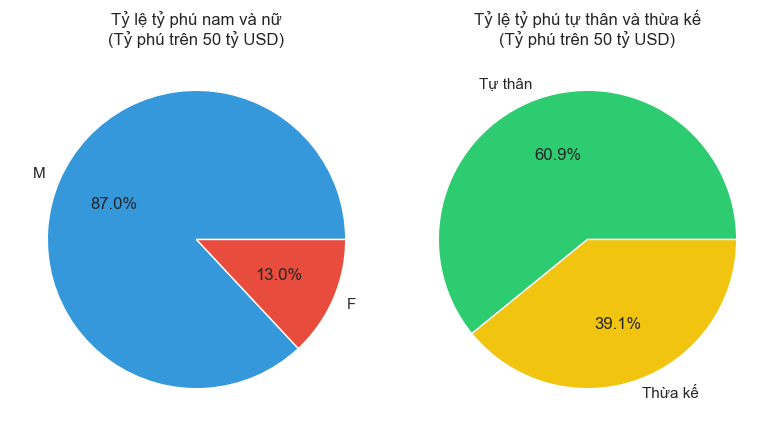

In [25]:
high_wealth_billionaires = df[df["finalWorth"] > 50000]
# display(high_wealth_billionaires)
# Thống kê chung về nhóm này
# Tính phân bố theo giới tính, tự thân/thừa kế, ngành nghề
gender_distribution = high_wealth_billionaires["gender"].value_counts()
self_made_distribution = high_wealth_billionaires["selfMade"].value_counts()
industry_distribution = high_wealth_billionaires["industries"].value_counts()

display(gender_distribution)
display(self_made_distribution)
display(industry_distribution)

# Scatterplot: Tài sản vs. Độ tuổi, màu theo ngành nghề
fig = px.scatter(
    high_wealth_billionaires,
    x="age",
    y="finalWorth",
    color="industries",
    title="Tài sản vs. Độ tuổi (Tỷ phú trên 50 tỷ USD)",
    symbol="gender",
    labels={"age": "Độ tuổi",
            "finalWorth": "Tài sản (triệu USD)", "industries": "Ngành nghề", "gender": "Giới tính", "selfMade": "Tự thân"},
    hover_name="personName", hover_data=["selfMade"],
    opacity=0.7,
)
fig.update_traces(marker=dict(size=10))
fig.show()

# Thiết lập figure với 2 biểu đồ tròn
fig, axes = plt.subplots(ncols=2, figsize=(8, 6))

# Biểu đồ tròn: Phân bố giới tính
gender_distribution.plot(kind="pie", autopct="%.1f%%",
                         ax=axes[0], colors=["#3498db", "#e74c3c"])
axes[0].set_ylabel("")
axes[0].set_title("Tỷ lệ tỷ phú nam và nữ\n(Tỷ phú trên 50 tỷ USD)")

# Biểu đồ tròn: Phân bố tự thân/thừa kế
self_made_distribution.plot(kind="pie", autopct="%.1f%%", labels=[
                            "Tự thân", "Thừa kế"], ax=axes[1], colors=["#2ecc71", "#f1c40f"])
axes[1].set_ylabel("")
axes[1].set_title(
    "Tỷ lệ tỷ phú tự thân và thừa kế\n(Tỷ phú trên 50 tỷ USD)")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét:**

- **Tỷ lệ nam giới chiếm ưu thế (87%) trong nhóm tỷ phú siêu giàu (trên 50 tỷ USD)**. Trong nhóm siêu giàu này, **có 3 tỉ phú nữ (chấm hình thoi) thuộc các ngành Thời trang và Đa ngành**.
- **Tỷ lệ tỷ phú tự thân chiếm 60.9%, cao hơn tỷ phú thừa kế (39.1%)**, điều này cho thấy phần lớn những người siêu giàu đã tự xây dựng tài sản của họ, thay vì thừa kế.
- **Ngành công nghệ (Technology) chiếm tỷ lệ cao nhất với 8 tỷ phú**, cho thấy đây là ngành có khả năng tạo ra tài sản siêu lớn, tiếp theo là **Fashion & Retail với 6 tỷ phú**.
- **Các tỉ phú trẻ siêu giàu trẻ nhất (từ 38-59 tuổi) hầu hết thuộc vào nhóm ngành Công nghệ** (trừ Elon Musk - ngành ô tô điện).
- **3/6 tỉ phú có trên 100 tỷ USD thuộc vào nhóm ngành Công nghệ**.
- **Các ngành như Media & Entertainment, Finance & Investments, và Telecom có số lượng ít hơn nhưng vẫn có đại diện trong nhóm này**.

**Insight:**

- **Tỷ phú siêu giàu chủ yếu là nam giới và có tỷ lệ tự thân cao**.
- **Ngành công nghệ và thời trang là hai ngành đóng góp nhiều nhất vào nhóm tỷ phú trên 50 tỷ USD**.
- **Các tỷ phú trẻ siêu giàu (từ 38-59 tuổi) đều thuộc nhóm ngành Công nghệ.**


### **Câu hỏi:** Đâu là các ngành nghề trẻ nhất? Ngành nghề nào phạm vi độ tuổi rộng nhất?


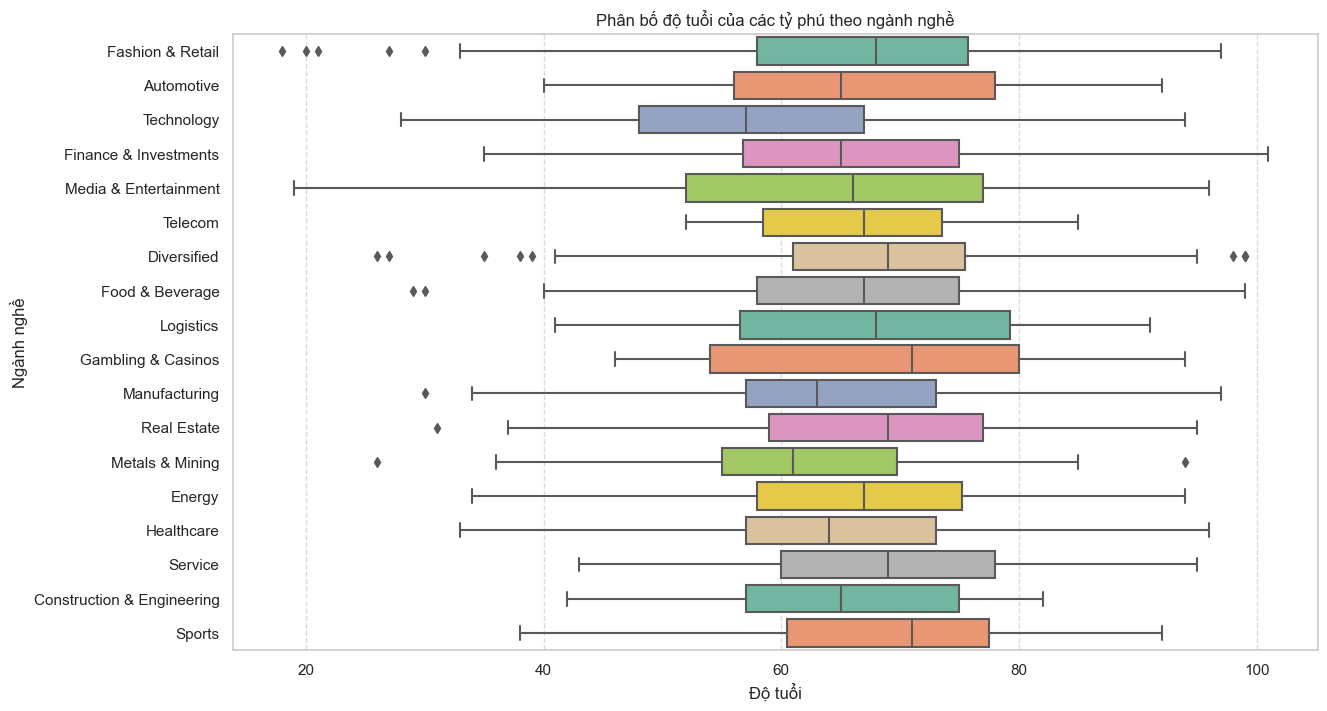

Độ tuổi trung bình của các ngành


industries
Technology                    57.480892
Metals & Mining               61.756757
Media & Entertainment         64.439560
Manufacturing                 64.679012
Healthcare                    64.681592
Construction & Engineering    64.688889
Finance & Investments         65.379032
Automotive                    66.136986
Food & Beverage               66.438679
Telecom                       66.677419
Fashion & Retail              66.710526
Energy                        67.530000
Service                       67.773585
Real Estate                   68.077720
Logistics                     68.300000
Gambling & Casinos            68.520000
Diversified                   68.754011
Sports                        69.025641
Name: age, dtype: float64

In [26]:
# Vẽ biểu đồ boxplot để phân tích phân bố độ tuổi theo ngành nghề
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="age", y="industries",
            showfliers=True, palette="Set2")

plt.xlabel("Độ tuổi")
plt.ylabel("Ngành nghề")
plt.title("Phân bố độ tuổi của các tỷ phú theo ngành nghề")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

# Tính độ tuổi trung bình theo ngành nghề và sắp xếp
age_by_industry = df.groupby("industries")["age"].mean().sort_values()

print("Độ tuổi trung bình của các ngành")
display(age_by_industry)
# # Vẽ biểu đồ cột ngang thể hiện độ tuổi trung bình theo ngành
# plt.figure(figsize=(14, 4))
# sns.barplot(y=age_by_industry.index,
#             x=age_by_industry.values, palette="coolwarm")

# plt.xlabel("Độ tuổi trung bình")
# plt.ylabel("Ngành nghề")
# plt.title("Độ tuổi trung bình của các tỷ phú theo ngành")
# plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

**Nhận xét:**

- **Ngành công nghệ có độ tuổi trung bình thấp nhất (57 tuổi)**, xác nhận giả thuyết rằng tỷ phú công nghệ thường trẻ hơn do tốc độ phát triển nhanh của ngành này. Tiếp **sau đó là Khai thác kim loại**.
- **Các ngành còn lại nằm trong khoảng 64 đến 69 tuổi**, không có quá nhiều sự khác biệt để so sánh
- **Ngành truyền thông giải trí có phạm vi tuổi rộng nhất (dưới 20 tuổi - hơn 90 tuổi)**, ngành thời trang và sức khoẻ cũng có phạm vi độ tuổi lớn không kém.
- **Ngành thời trang có tỉ phú trẻ tuổi nhất** chỉ mới 18 tuổi. **Đầu từ tài chính có tỉ phú lớn tuổi nhất** đã 101 tuổi.

**Insight:**

- **Ngành công nghệ có tỷ phú trẻ nhất, phù hợp với xu hướng startup tăng trưởng nhanh.**
- **Các ngành thời trang, giải trí, công nghệ có sự phân bố độ tuổi đa dạng hơn.**
- **Ngành thời trang và giải trí có sự xuất hiện của các tỉ phú trẻ tuổi nhất - dưới 20 tuổi.**


### **Câu hỏi:** Ngành nào cho ra tổng tài sản cao nhất và tỉ lệ tỷ phú tự thân của chúng?


In [27]:
# Tính tổng tài sản và tỷ lệ tỷ phú tự thân trong từng ngành
industry_wealth = df.groupby("industries").agg(
    total_wealth=("finalWorth", "sum"),
    selfmade_ratio=("selfMade", lambda x: round((x.sum() / len(x)) * 100, 2))
    # avg_age = ("age", lambda x: round((x.sum() / len(x)), 0))
).reset_index()

# Vẽ treemap với Plotly
fig = px.treemap(industry_wealth,
                 path=["industries"],
                 values="total_wealth",
                 color="selfmade_ratio",
                 color_continuous_scale="Blues",
                 title="Tổng tài sản của các ngành và tỷ lệ tỷ phú tự thân",
                 labels={
                     "total_wealth": "Tổng tài sản (triệu USD)", "selfmade_ratio": "Phần trăm tỉ phú tự thân (%)"},
                 hover_data={"selfmade_ratio": True})

# Hiển thị biểu đồ
fig.update_traces(textinfo="label+percent entry")

fig.show()

**Nhận xét:**

- **Ngành công nghệ (Technology) chiếm tỷ trọng tài sản lớn nhất (15%)**, cho thấy đây là lĩnh vực có nhiều tỷ phú sở hữu tài sản khổng lồ, phù hợp với sự phát triển của các công ty công nghệ lớn.
- **Ngành thời trang & bán lẻ (Fashion & Retail) đứng thứ hai với 14% tổng tài sản**, cho thấy ngành này cũng tạo ra nhiều tài sản lớn, có thể do nhu cầu tiêu dùng cao và thương hiệu toàn cầu.
- **Tài chính & đầu tư (Finance & Investments) xếp thứ ba (13%)**, phản ánh sự quan trọng của ngành tài chính trong việc tạo ra sự giàu có.
- **Các ngành như dịch vụ, xây dựng, thể thao và cờ bạc có tỷ trọng tài sản thấp hơn (dưới 2%)**, điều này có thể do số lượng tỷ phú trong ngành ít hoặc tài sản của họ không quá vượt trội.

**Tỷ lệ tỷ phú tự thân:**

- **Ngành công nghệ có tỷ lệ tỷ phú tự thân cao nhất (trên 90%)**, điều này phản ánh thực tế rằng phần lớn các tỷ phú trong lĩnh vực này là những nhà sáng lập startup thành công.
- **Ngành viễn thông (Telecom) cũng có tỷ lệ tỷ phú tự thân cao**, có thể do yêu cầu đầu tư ban đầu lớn nhưng vẫn có cơ hội cho các doanh nhân phát triển từ con số 0.
- **Các lĩnh vực đa ngành, thực phẩm (Food & Beverage) và xây dựng có tỷ lệ tỷ phú thừa kế cao nhất**, điều này hợp lý vì nhiều doanh nghiệp trong lĩnh vực này là doanh nghiệp gia đình.

**Insight:**

- **Ngành công nghệ có tổng tài sản cao nhất và cũng có tỷ lệ tỷ phú tự thân cao nhất.**
- **Top 4 ngành công nghệ, thời trang, tài chính và sản xuất chiếm 50% tổng tài sản của toàn bộ tỉ phú.**
- **Ngành cờ bạc, thể thao, và viễn thông có tỷ trọng tài sản thấp hơn nhiều so với các ngành khác.**
- **Các lĩnh vực đa ngành, thực phẩm (Food & Beverage) và xây dựng có tỷ lệ tỷ phú thừa kế cao nhất**


### **Câu hỏi:** Phân bố số lượng tỉ phú theo các ngành nghề có sự thay đổi như thế nào qua các thế hệ?


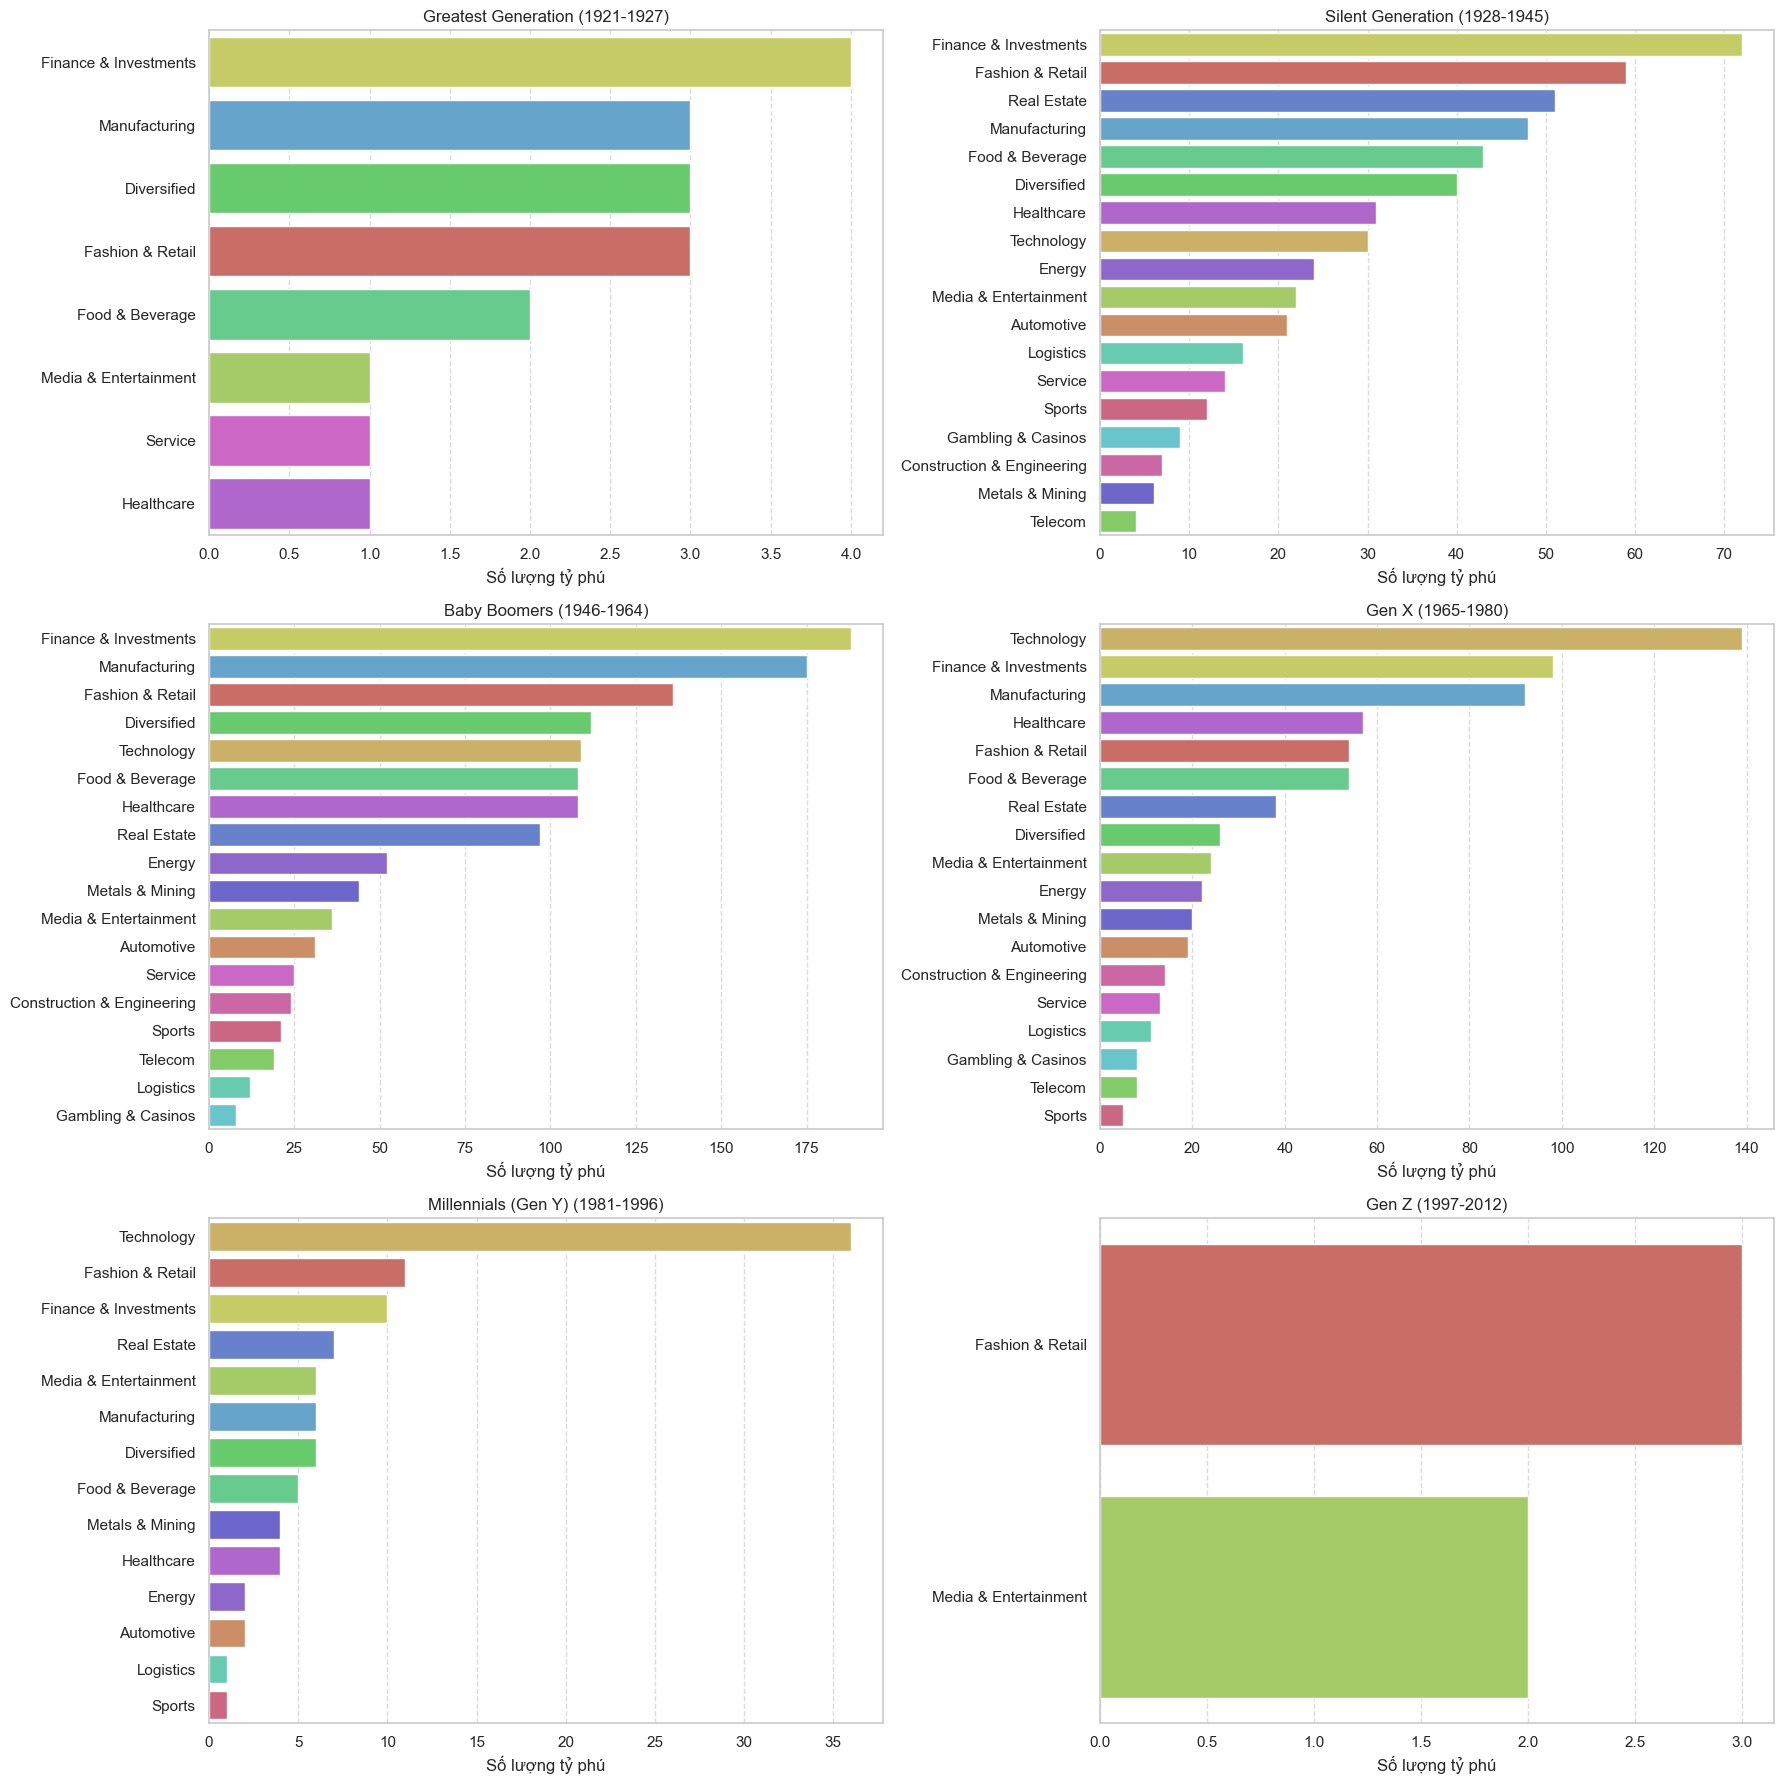

In [28]:
all_industries = df["industries"].unique()
industry_colors = {industry: color for industry, color in zip(
    all_industries, sns.color_palette("hls", len(all_industries)))}

fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()  # Chuyển ma trận subplot thành danh sách để dễ truy cập

# Vẽ biểu đồ cho từng thế hệ
for i, (generation, (start, end)) in enumerate(generation_ranges.items()):
    gen_data = df[df["generation"] == generation]
    industry_counts = gen_data["industries"].value_counts()

    if not industry_counts.empty:
        # Lấy màu từ dictionary industry_colors, mặc định màu xám nếu không có
        colors = [industry_colors.get(ind, "#D3D3D3")
                  for ind in industry_counts.index]

        sns.barplot(
            x=industry_counts.values,
            y=industry_counts.index,
            palette=colors,
            ax=axes[i]
        )

        axes[i].set_xlabel("Số lượng tỷ phú")
        axes[i].set_ylabel("")
        axes[i].set_title(f"{generation} ({start}-{end})", fontsize=12)
        axes[i].grid(axis="x", linestyle="--", alpha=0.7)

# Căn chỉnh layout
plt.tight_layout()
plt.show()

**Nhận xét:**

- **Một số ngành như công nghệ, năng lượng, logistic không có sự xuất hiện của các tỉ phú ở Greatest Generation (1921-1927)**. Có thể do ở thế hệ này, một số ngành hiện đại như công nghệ hay logistic chưa phổ biến, nhưng chủ yếu là do các tỉ phú ở thế hệ này có thể đã qua đời do tuổi cao (bằng chứng là số lượng tỉ phú ở thế hệ này không còn nhiều).
- Từ Silent Generation (1928-1945) trở về sau, các tỷ phú đã xuất hiện ở mọi ngành. **Tài chính, thời trang, bất động sản, sản xuất và thực phẩm là các ngành phổ biến nhất trong thế hệ Silent Generation (1928-1945)**. Tuy nhiên, đây vẫn là các ngành khá truyền thống, các ngành hiện đại như công nghệ, năng lượng, logistic đã xuất hiện tuy nhiên không chiếm quá nhiều thị phần ở thế hệ này.
- **Ở thế hệ Baby Boomers (1946-1964), tài chính, sản xuất và thời trang vẫn là các ngành phổ biến nhất. Đây cũng là thế hệ có nhiều tỷ phú nhất, gần 50% các tỷ phú thuộc vào thế hệ này.**
- **Ở thế hệ Gen X (1965-1980), ngành công nghệ đã vươn lên vị trí đầu bảng, xét về phần trăm tổng số tỷ phú thuộc thế hệ này.** Tiếp sau đó là tài chính và sản xuất.
- **Thế hệ Millennials hay Gen Y (1981-1996) với lớp tỷ phú trẻ tuổi đã tăng trưởng vượt trội về số lượng tỷ phú tham gia ngành công nghệ, bỏ xa các ngành khác ở cùng thế hệ.**
- **Thế hệ Gen Z (1997-2012) chỉ có 5 đại diện là các tỷ phú siêu trẻ thuộc các nhóm ngành về thời trang và truyền thông giải trí.**

**Insight:**

- **Ngành công nghệ chỉ thực sự bùng nổ từ thế hệ Gen X trở đi, chiếm tỷ lệ áp đảo trong thế hệ Millennials (Gen Y).**
- **Finance & Investments, Manufacturing, và Fashion & Retail là các ngành phổ biến nhất ở thế hệ Baby Boomers và Silent Generation.**
- **Gen Z có rất ít tỷ phú, và họ chủ yếu đến từ các ngành thời trang và truyền thông giải trí.**


## 3. Các câu hỏi về sự phân bố tài sản theo quốc gia


In [29]:
country_df = df[df['country'] != "Unknown"]

### **Câu hỏi:** Các tỷ phú định cư ở đâu trên bản đồ thế giới?


In [30]:
# Đếm số tỷ phú theo quốc gia và châu lục
country_counts = df.groupby(["country", "continent"]).size(
).reset_index(name="num_billionaires")
country_counts = country_counts.sort_values(
    by="num_billionaires", ascending=False).reset_index(drop=True)
country_counts["ranking"] = country_counts.index + 1

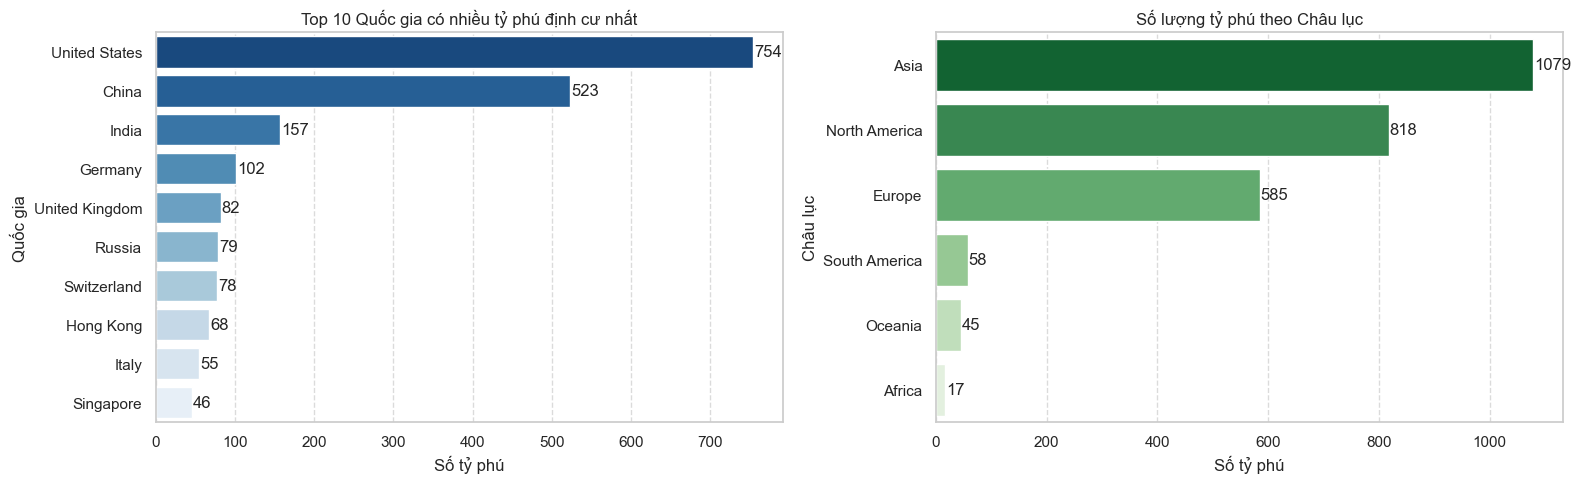

In [31]:
# --------------------------WORLD MAP--------------------------
# Áp dụng thang logarit để giảm sự chênh lệch giữa Mỹ, Trung Quốc và các nước nhỏ hơn
country_counts["log_num_billionaires"] = np.log1p(
    country_counts["num_billionaires"])  # log(1 + x) để tránh log(0)

# Vẽ bản đồ Choropleth
choropleth = px.choropleth(
    country_counts,
    locations="country",
    locationmode="country names",
    color="log_num_billionaires",
    color_continuous_scale="Darkmint",
    title="Số lượng tỷ phú định cư ở các quốc gia",
    labels={"num_billionaires": "Số tỷ phú", "ranking": "Rank"},
    hover_name="country",
    hover_data={"num_billionaires": True,
                "log_num_billionaires": False, "country": False, "ranking": True},
)

# Xác định giá trị tick cho thanh màu dựa trên số tỷ phú thực tế
tick_values = np.log1p([1, 10, 50, 100, 500, 1000])
tick_labels = ["1", "10", "50", "100", "500", "1000"]

choropleth.update_layout(
    width=1200,
    height=700,
    dragmode=False,
    modebar_remove=["zoom", "pan"],
    coloraxis_colorbar=dict(
        len=0.9,
        title="Số tỷ phú",
        tickvals=tick_values,
        ticktext=tick_labels
    )
)

# Tọa độ của các châu lục (latitude, longitude)
continent_positions = {
    "Asia": {"lat": 30, "lon": 100},
    "North America": {"lat": 50, "lon": -100},
    "Europe": {"lat": 55, "lon": 10},
    "South America": {"lat": -15, "lon": -60},
    "Oceania": {"lat": -25, "lon": 140},
    "Africa": {"lat": 0, "lon": 20},
}

# Thêm Scattergeo để hiển thị tên châu lục mà không ảnh hưởng đến màu của bản đồ
continent_labels = go.Scattergeo(
    lon=[pos["lon"] for pos in continent_positions.values()],
    lat=[pos["lat"] for pos in continent_positions.values()],
    text=[f"<b>{cont}</b>" for cont in continent_positions.keys()],
    mode="text",
    textfont=dict(size=18, color="black", family="Arial Black"),
    showlegend=False
)

# Tạo Figure từ Choropleth gốc
fig = go.Figure(data=choropleth.data)
fig.add_trace(continent_labels)
fig.update_layout(choropleth.layout)
fig.update_traces(hoverinfo="skip", selector=dict(type="scattergeo"))
fig.show()


# --------------------------BAR CHART--------------------------
# Đếm số tỷ phú theo châu lục
continent_counts = country_df.groupby(
    ["continent"]).size().reset_index(name="num_billionaires")
continent_counts = continent_counts.sort_values(
    by="num_billionaires", ascending=False).reset_index(drop=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Vẽ biểu đồ số lượng tỷ phú theo quốc gia (Top 10)
top_10_countries = country_counts.head(10)
sns.barplot(x="num_billionaires", y="country",
            data=top_10_countries, palette="Blues_r", ax=axes[0])
axes[0].set_xlabel("Số tỷ phú")
axes[0].set_ylabel("Quốc gia")
axes[0].set_title("Top 10 Quốc gia có nhiều tỷ phú định cư nhất")
axes[0].grid(axis="x", linestyle="--", alpha=0.7)

# Thêm số lượng tỷ phú lên từng thanh (Top 10 quốc gia)
for index, value in enumerate(top_10_countries["num_billionaires"]):
    axes[0].text(value + 1, index, str(value), va='center', fontsize=12)

# Vẽ biểu đồ số lượng tỷ phú theo châu lục
sns.barplot(x="num_billionaires", y="continent",
            data=continent_counts, palette="Greens_r", ax=axes[1])
axes[1].set_xlabel("Số tỷ phú")
axes[1].set_ylabel("Châu lục")
axes[1].set_title("Số lượng tỷ phú theo Châu lục")
axes[1].grid(axis="x", linestyle="--", alpha=0.7)

# Thêm số lượng tỷ phú lên từng thanh (Châu lục)
for index, value in enumerate(continent_counts["num_billionaires"]):
    axes[1].text(value + 1, index, str(value), va='center', fontsize=12)

plt.tight_layout()

plt.show()

**Nhận xét:**

- **Mỹ và Trung Quốc dẫn đầu về số lượng tỷ phú**, chiếm phần lớn trong danh sách toàn cầu.
- **Ấn Độ, Đức và Anh** là ba quốc gia có nhiều tỷ phú tiếp theo, phản ánh sự phát triển kinh tế và thị trường đầu tư mạnh mẽ.
- **Châu Á có nhiều tỷ phú nhất**, tiếp theo là **Bắc Mỹ và châu Âu**, cho thấy sự tăng trưởng nhanh chóng của các nền kinh tế châu Á.
- **Nam Mỹ, châu Đại Dương và châu Phi có số lượng tỷ phú thấp**, chủ yếu do quy mô kinh tế và cơ hội kinh doanh hạn chế.
- Ở **châu Âu**, hầu hết các quốc gia đều có tỷ phú, trong khi **châu Phi chỉ có một vài nước** có tỷ phú định cư.
- Dù Mỹ có số lượng tỷ phú nhiều nhất, nhưng **châu Á vẫn là khu vực có nhiều tỷ phú nhất**, cho thấy sự phân bố rộng hơn so với châu Mỹ.

**Insight:**

- **Mỹ và Trung Quốc thống trị danh sách tỷ phú**, với gần một nửa số tỷ phú thế giới định cư tại đây.
- **Châu Á có nhiều tỷ phú hơn Bắc Mỹ và châu Âu**, phản ánh tốc độ phát triển kinh tế mạnh mẽ.
- **Ở châu Âu, tỷ phú có mặt ở hầu hết các quốc gia**, trong khi **châu Phi chỉ có một số ít nước có tỷ phú định cư**.


### **Câu hỏi:** Đâu là sự khác nhau về tỷ lệ nam nữ và tỷ phú tự thân ở các quốc gia (xét theo quốc tịch)?


Do 2 thông tin này có những điều kiện về bối cảnh nguồn gốc nơi họ lớn lên hay quốc gia họ sinh ra nên dùng trường quốc tịch `countryOfCitizenship` thay vì `country`.


In [32]:

# Tính tổng số tỷ phú mỗi quốc gia
total_billionaires = country_df.groupby("countryOfCitizenship")[
    "personName"].count().reset_index(name="total_billionaires")

# Tính số lượng tỷ phú tự thân mỗi quốc gia
self_made_counts = country_df.groupby(["countryOfCitizenship", "selfMade"])[
    "personName"].count().unstack(fill_value=0)

# Tính tỷ lệ tỷ phú tự thân
self_made_counts["self_made_ratio"] = (self_made_counts.get(
    True, 0) / self_made_counts.sum(axis=1)) * 100

# Tính số lượng tỷ phú nam và nữ mỗi quốc gia
gender_counts = country_df.groupby(["countryOfCitizenship", "gender"])[
    "personName"].count().unstack(fill_value=0)

# Tính tỷ lệ tỷ phú nam nữ
gender_counts["male_ratio"] = (
    gender_counts['M'] / gender_counts[["F", "M"]].sum(axis=1)) * 100
gender_counts["female_ratio"] = (
    gender_counts['F'] / gender_counts[["F", "M"]].sum(axis=1)) * 100

# Gộp dữ liệu lại theo quốc gia
billionaire_demographics = total_billionaires.merge(
    self_made_counts[["self_made_ratio"]], on="countryOfCitizenship", how="left")
billionaire_demographics = billionaire_demographics.merge(
    gender_counts[["male_ratio", "female_ratio"]], on="countryOfCitizenship", how="left")

# Sắp xếp theo số tỷ phú giảm dần
billionaire_demographics = billionaire_demographics.sort_values(
    by="total_billionaires", ascending=False).reset_index(drop=True)

# Hiển thị kết quả
print("Top 10 quốc gia có nhiều tỷ phú theo quốc tích nhất:")
billionaire_demographics.head(10)

Top 10 quốc gia có nhiều tỷ phú theo quốc tích nhất:


,countryOfCitizenship,total_billionaires,self_made_ratio,male_ratio,female_ratio
0,United States,734,71.798365,86.648501,13.351499
1,China,491,97.148676,89.816701,10.183299
2,India,166,43.373494,92.168675,7.831325
3,Germany,116,30.172414,74.137931,25.862069
4,Russia,104,99.038462,98.076923,1.923077
5,Hong Kong,68,66.176471,83.823529,16.176471
6,Canada,63,76.190476,90.476190,9.523810
7,Italy,62,35.483871,69.354839,30.645161
8,Brazil,51,43.137255,88.235294,11.764706
9,United Kingdom,50,90.000000,94.000000,6.000000


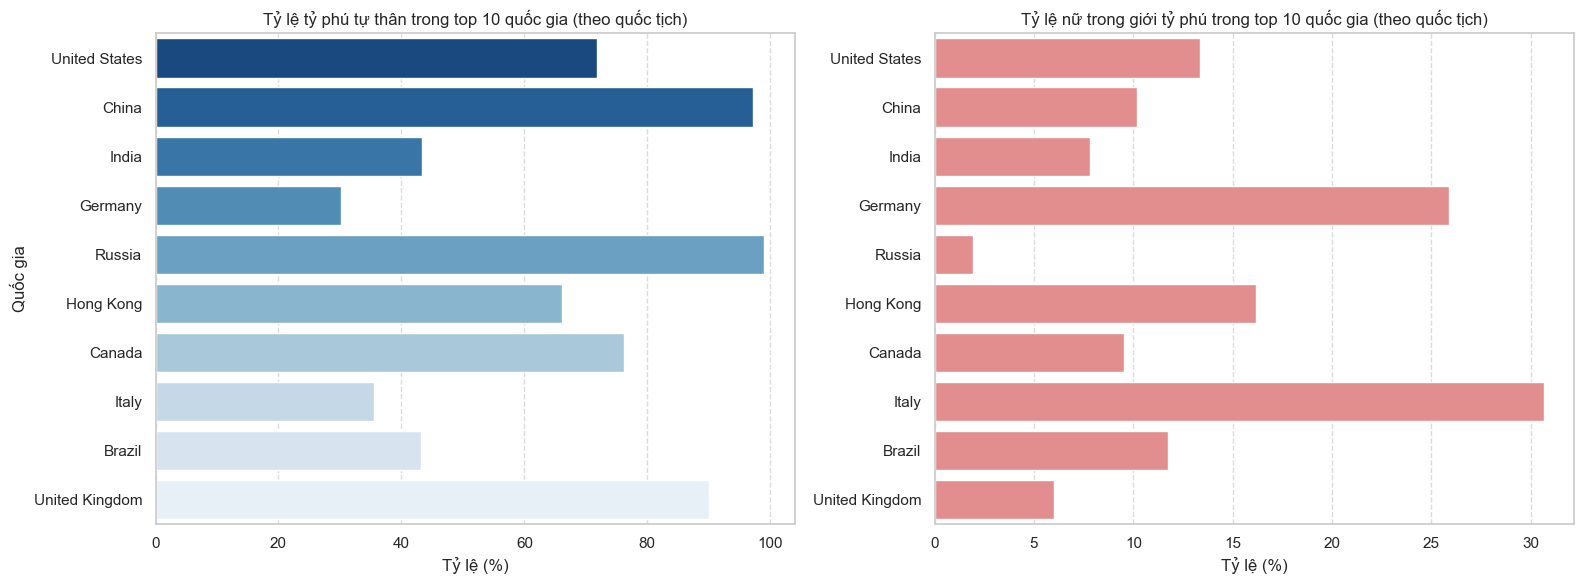

In [33]:
# Lọc dữ liệu chỉ lấy các quốc gia top đầu
top_billionaire_demographics = billionaire_demographics.head(10)

# Tạo figure với 2 subplot ngang
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Vẽ biểu đồ tỷ lệ tỷ phú tự thân trong top 10 quốc gia
sns.barplot(x="self_made_ratio", y="countryOfCitizenship",
            data=top_billionaire_demographics, palette="Blues_r", ax=axes[0])
axes[0].set_xlabel("Tỷ lệ (%)")
axes[0].set_ylabel("Quốc gia")
axes[0].set_title(
    "Tỷ lệ tỷ phú tự thân trong top 10 quốc gia (theo quốc tịch)")
axes[0].grid(axis="x", linestyle="--", alpha=0.7)

# Vẽ biểu đồ chỉ hiển thị tỷ lệ nữ (nam sẽ tự suy ra)
sns.barplot(x="female_ratio", y="countryOfCitizenship",
            data=top_billionaire_demographics, color="lightcoral", ax=axes[1])
axes[1].set_xlabel("Tỷ lệ (%)")
axes[1].set_ylabel("")
axes[1].set_title(
    "Tỷ lệ nữ trong giới tỷ phú trong top 10 quốc gia (theo quốc tịch)")
axes[1].grid(axis="x", linestyle="--", alpha=0.7)

# Căn chỉnh layout
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

**Nhận xét:**

- Có sự khác biệt về số lượng tỷ phú theo quốc tịch so với định cư, tuy nhiên **Mỹ và Trung Quốc vẫn là 2 quốc gia top đầu**.
- Các quốc gia như **Brazil và Canada tuy xuất hiện trong top 10 quốc tịch**, tuy nhiên lại **không góp mặt trong top 10 định cư**, **chứng tỏ các tỷ phú ở các quốc gia này có xu hướng định cư ở các quốc gia khác lân cận như Mỹ.**
- **Tỷ lệ tỷ phú tự thân có sự chênh lệch lớn giữa các quốc gia.** **Trung Quốc** và **Nga** có tỷ lệ tỷ phú tự thân cao nhất, cho thấy môi trường kinh doanh và khởi nghiệp mạnh mẽ. Trong khi đó, **Đức**, **Ý**, **Brazil** và **Ấn Độ** có tỷ lệ tỷ phú tự thân thấp hơn, có thể do phần lớn tài sản được thừa kế.
- **Các quốc gia châu Âu có tỷ lệ nữ giới cao nhất trong top 10.** **Đức**, **Ý** và **Thụy Sĩ** đều có tỷ lệ nữ tỷ phú trên 20%, đặc biệt **Ý** đạt mức cao nhất với hơn 30%.

**Insight:**

- **Trung Quốc và Nga là hai quốc gia có tỷ lệ tỷ phú tự thân cao nhất, trong khi các nước châu Âu như Đức và Ý có tỷ lệ thấp hơn do yếu tố thừa kế tài sản.**
- **Các nước châu Âu như Đức, Ý và Thụy Sĩ có tỷ lệ nữ tỷ phú cao hơn so với các quốc gia khác.**


### **Câu hỏi:** Đâu là các quốc gia có lượng tỷ phú di cư nhiều nhất (quốc tịch A nhưng sinh sống ở quốc gia khác A)? Đâu là các quốc gia có lượng tỷ phú nhập tịch nhiều nhất (sinh sống ở quốc gia B, nhưng quốc tịch khác B)?


In [34]:
# Lọc ra danh sách các tỷ phú có quốc tịch nhưng không sống tại quốc gia đó
migrated_billionaires = country_df[country_df["countryOfCitizenship"]
                                   != country_df["country"]]

# Đếm số tỷ phú di cư theo quốc tịch (quốc gia bị rời đi)
migrated_billionaire_counts = migrated_billionaires.groupby("countryOfCitizenship")[
    "personName"].count().reset_index(name="num_migrated_billionaires")

# Đếm tổng số tỷ phú theo quốc tịch
total_billionaires_by_citizenship = country_df.groupby("countryOfCitizenship")[
    "personName"].count().reset_index(name="total_billionaires")

# Gộp dữ liệu để tính tỷ lệ phần trăm tỷ phú rời đi
migrated_billionaire_counts = migrated_billionaire_counts.merge(
    total_billionaires_by_citizenship, on="countryOfCitizenship", how="left"
)

# Tính tỷ lệ phần trăm số tỷ phú rời đi
migrated_billionaire_counts["migration_rate"] = (migrated_billionaire_counts["num_migrated_billionaires"] /
                                                 migrated_billionaire_counts["total_billionaires"]) * 100

migrated_billionaire_counts["non_migration_rate"] = 100 - \
    migrated_billionaire_counts["migration_rate"]

# Sắp xếp theo tỷ lệ di cư giảm dần
migrated_billionaire_counts = migrated_billionaire_counts.sort_values(
    by="migration_rate", ascending=False).reset_index(drop=True)

# Hiển thị kết quả
top_migrated_billionaire_counts = migrated_billionaire_counts[
    migrated_billionaire_counts['total_billionaires'] > 30]


top_migrated_billionaire_counts

,countryOfCitizenship,num_migrated_billionaires,total_billionaires,migration_rate,non_migration_rate
21,Canada,21,63,33.333333,66.666667
22,Sweden,13,39,33.333333,66.666667
25,United Kingdom,15,50,30.000000,70.000000
28,Hong Kong,19,68,27.941176,72.058824
30,Russia,25,104,24.038462,75.961538
31,France,10,42,23.809524,76.190476
36,Brazil,8,51,15.686275,84.313725
37,Australia,7,47,14.893617,85.106383
38,Italy,9,62,14.516129,85.483871
40,Taiwan,7,49,14.285714,85.714286


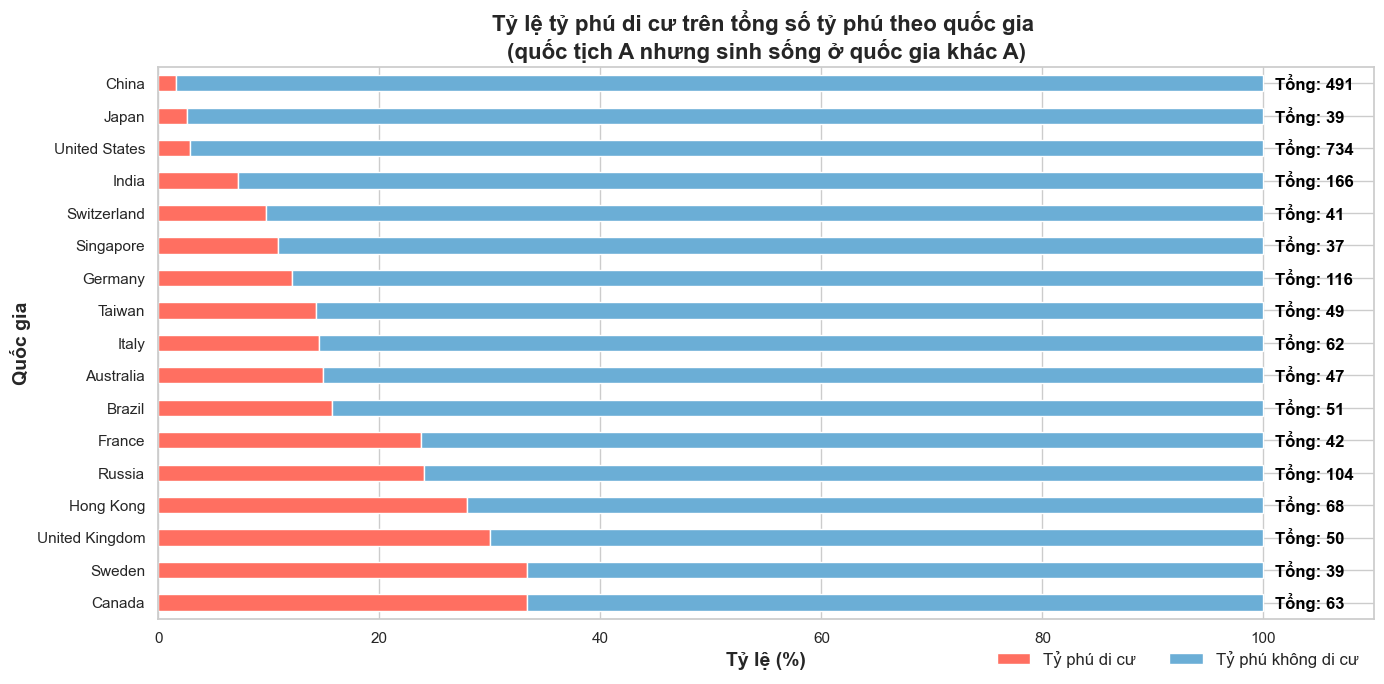

In [35]:
# Tạo figure
fig, ax = plt.subplots(figsize=(14, 7))

# Vẽ stacked bar chart theo %
top_migrated_billionaire_counts.set_index("countryOfCitizenship")[
    ["migration_rate", "non_migration_rate"]
].plot(kind="barh", stacked=True, color=["#FF6F61", "#6BAED6"], ax=ax)

# Thêm nhãn cho tổng số tỷ phú bên phải mỗi thanh
for index, value in enumerate(top_migrated_billionaire_counts["total_billionaires"]):
    ax.text(101, index, f"Tổng: {int(value)}", va="center",
            fontsize=12, color="black", fontweight="bold")

# Cấu hình biểu đồ
ax.set_xlabel("Tỷ lệ (%)", fontsize=14, fontweight="bold")
ax.set_ylabel("Quốc gia", fontsize=14, fontweight="bold")
ax.set_title("Tỷ lệ tỷ phú di cư trên tổng số tỷ phú theo quốc gia \n(quốc tịch A nhưng sinh sống ở quốc gia khác A)",
             fontsize=16, fontweight="bold")
legend = ax.legend(["Tỷ phú di cư", "Tỷ phú không di cư"], fontsize=12,
                   loc="upper right",  ncol=2, frameon=False,  bbox_to_anchor=(1.0, -0.03))
ax.set_xlim(0, 110)

# Căn chỉnh bố cục
plt.tight_layout()
plt.show()

**Nhận xét:**

- **Các quốc gia có tỷ lệ tỷ phú rời đi cao nhất chủ yếu là những nền kinh tế phát triển nhưng có mức thuế cao hoặc chính trị không ổn định.** **Canada, Thụy Điển, Anh, Hồng Kông và Nga** có tỷ lệ tỷ phú rời đi cao, cho thấy các yếu tố như thuế suất cao, môi trường đầu tư hoặc chính sách không còn hấp dẫn với giới siêu giàu.
- **Các quốc gia châu Âu như Pháp, Đức, Ý cũng có tỷ lệ tỷ phú rời đi đáng kể.** Điều này có thể liên quan đến các chính sách thuế cao, đặc biệt là thuế tài sản hoặc thuế thừa kế, khiến nhiều tỷ phú chọn định cư ở các quốc gia có chính sách ưu đãi hơn như Thụy Sĩ hoặc Monaco.
- **Hồng Kông và Singapore có tỷ lệ tỷ phú rời đi cao hơn mong đợi.** Dù là trung tâm tài chính hàng đầu, nhưng số liệu cho thấy một phần tỷ phú gốc từ đây đã chuyển đến các quốc gia khác, có thể do bất ổn chính trị hoặc những thay đổi trong chính sách tài chính.
- **Các quốc gia phát triển vốn có nền kinh tế ổn định như Mỹ, Trung Quốc, Nhật Bản tuy có lượng tỷ phú lớn nhưng vẫn duy trì được mức di cư thấp**

**Insight:**

- **Các quốc gia có thuế suất cao như Canada, Thụy Điển, Anh và Pháp là những nơi có tỷ lệ tỷ phú rời đi cao nhất.**
- **Xu hướng "chảy máu chất xám" của giới siêu giàu tập trung vào các quốc gia có nền kinh tế phát triển nhưng không còn giữ được sức hút cho tầng lớp tỷ phú.**
- **Các quốc gia phát triển vốn có nền kinh tế ổn định như Mỹ, Trung Quốc, Nhật Bản tuy có lượng tỷ phú lớn nhưng vẫn duy trì được mức "chảy máu" thấp**


In [36]:
# Lọc ra danh sách các tỷ phú có nơi định cư khác với quốc tịch
incoming_billionaires = country_df[country_df["countryOfCitizenship"]
                                   != country_df["country"]]

# Đếm số tỷ phú nhập cư theo nơi định cư (quốc gia thu hút tỷ phú)
incoming_billionaire_counts = incoming_billionaires.groupby(
    "country")["personName"].count().reset_index(name="num_incoming_billionaires")

# Đếm tổng số tỷ phú theo nơi định cư
total_billionaires_by_residence = country_df.groupby(
    "country")["personName"].count().reset_index(name="total_billionaires_residence")

# Gộp dữ liệu để tính tỷ lệ phần trăm tỷ phú nhập cư
incoming_billionaire_counts = incoming_billionaire_counts.merge(
    total_billionaires_by_residence, on="country", how="left"
)

# Tính tỷ lệ phần trăm số tỷ phú nhập cư
incoming_billionaire_counts["incoming_rate"] = (incoming_billionaire_counts["num_incoming_billionaires"] /
                                                incoming_billionaire_counts["total_billionaires_residence"]) * 100
incoming_billionaire_counts["non_incoming_rate"] = 100 - \
    incoming_billionaire_counts["incoming_rate"]

# Sắp xếp theo số lượng tỷ phú nhập cư giảm dần
incoming_billionaire_counts = incoming_billionaire_counts.sort_values(
    by="incoming_rate", ascending=False).reset_index(drop=True)

# Hiển thị kết quả
top_incoming_billionaire_counts = incoming_billionaire_counts[
    incoming_billionaire_counts['total_billionaires_residence'] > 10]
top_incoming_billionaire_counts

,country,num_incoming_billionaires,total_billionaires_residence,incoming_rate,non_incoming_rate
12,Monaco,15,17,88.235294,11.764706
13,United Arab Emirates,13,17,76.470588,23.529412
16,United Kingdom,47,82,57.317073,42.682927
17,Switzerland,41,78,52.564103,47.435897
18,Austria,4,11,36.363636,63.636364
19,Singapore,13,46,28.260870,71.739130
20,Hong Kong,19,68,27.941176,72.058824
21,Israel,5,26,19.230769,80.769231
24,France,3,35,8.571429,91.428571
25,China,40,523,7.648184,92.351816


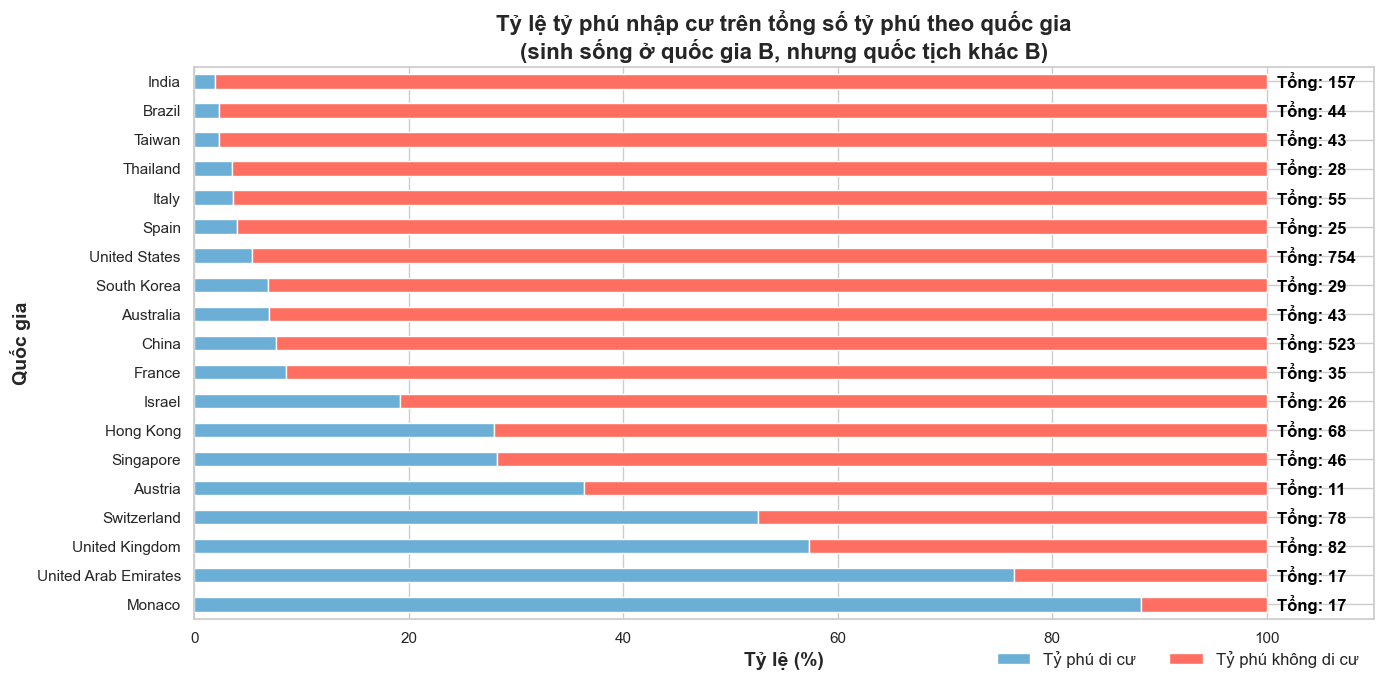

In [37]:
# Tạo figure
fig, ax = plt.subplots(figsize=(14, 7))

# Vẽ stacked bar chart theo %
top_incoming_billionaire_counts.set_index("country")[
    ["incoming_rate", "non_incoming_rate"]
].plot(kind="barh", stacked=True, color=["#6BAED6", "#FF6F61"], ax=ax)

# Thêm nhãn cho tổng số tỷ phú bên phải mỗi thanh
for index, value in enumerate(top_incoming_billionaire_counts["total_billionaires_residence"]):
    ax.text(101, index, f"Tổng: {int(value)}", va="center",
            fontsize=12, color="black", fontweight="bold")

# Cấu hình biểu đồ
ax.set_xlabel("Tỷ lệ (%)", fontsize=14, fontweight="bold")
ax.set_ylabel("Quốc gia", fontsize=14, fontweight="bold")
ax.set_title("Tỷ lệ tỷ phú nhập cư trên tổng số tỷ phú theo quốc gia\n(sinh sống ở quốc gia B, nhưng quốc tịch khác B)",
             fontsize=16, fontweight="bold")
ax.set_xlim(0, 110)  # Mở rộng trục X để nhãn không bị chồng lên nhau

# Di chuyển legend vào trung tâm trên biểu đồ
legend = ax.legend(["Tỷ phú di cư", "Tỷ phú không di cư"], fontsize=12,
                   loc="upper right", bbox_to_anchor=(1.0, -0.03), ncol=2, frameon=False)
# legend = ax.legend(["Tỷ phú di cư", "Tỷ phú không di cư"], fontsize=12,
#                    loc="upper right",  ncol=2, frameon=False,  bbox_to_anchor=(1.0, -0.03))
# Căn chỉnh bố cục
plt.tight_layout()
plt.show()

**Nhận xét:**

- **Monaco và UAE là các quốc gia có tỷ lệ tỷ phú nhập cư cao nhất do đây là các thiên đường thuế và có chính sách định cư hấp dẫn.** Tuy chỉ có lượng tỷ phú ít ỏi 17 người mỗi nước nhưng hơn 75% là các tỷ phú nhập cư.
- **Anh tuy có tỷ lệ tỷ phú rời đi cao nhưng đồng thời lượng tỷ phú nhập cư cũng nhiều.** **Các nước phát triển khác như Thuỵ Sĩ và Áo cũng có tỷ lệ tỷ phú nhập cư cao.** Đây là những nước có hệ thống kinh tế và tài chính mạnh mẽ, cùng với chất lượng sống cao, thu hút nhiều tỷ phú nước ngoài định cư.
- **Mỹ và Trung Quốc có số lượng tỷ phú nhập cư đáng kể nhưng tỷ lệ thấp.** Dù có nền kinh tế lớn và hấp dẫn đối với giới doanh nhân, nhưng do tổng số tỷ phú nội địa quá lớn nên tỷ lệ nhập cư không chiếm ưu thế.

**Insight:**

- **Các thiên đường thuế và trung tâm tài chính như Monaco, UAE, Thụy Sĩ, Anh, và Áo là điểm đến hàng đầu của giới tỷ phú toàn cầu.**
- **Mỹ và Trung Quốc có lượng tỷ phú nhập cư lớn nhưng tỷ lệ thấp do quy mô giới siêu giàu bản địa quá lớn.**


### **Câu hỏi:** Đâu là các ngành nghề dẫn đầu của các quốc gia lớn (xét về số lượng tỷ phú và tổng tài sản)?


In [38]:
# Đếm số tỷ phú theo ngành nghề và quốc gia
industry_counts = country_df.groupby(["countryOfCitizenship", "industries"])[
    "personName"].count().reset_index(name="num_billionaires")

# Xác định ngành phổ biến nhất tại mỗi quốc gia
top_industry_per_country = industry_counts.loc[industry_counts.groupby(
    "countryOfCitizenship")["num_billionaires"].idxmax()]

# Tính tỷ lệ phần trăm ngành phổ biến nhất trong tổng số tỷ phú của từng quốc gia
total_billionaires_by_country = country_df.groupby("countryOfCitizenship")[
    "personName"].count().reset_index(name="total_billionaires")

# Gộp dữ liệu
top_industry_per_country = top_industry_per_country.merge(
    total_billionaires_by_country, on="countryOfCitizenship", how="left")

# Tính tỷ lệ phần trăm của ngành đứng đầu
top_industry_per_country["industry_dominance"] = (top_industry_per_country["num_billionaires"] /
                                                  top_industry_per_country["total_billionaires"]) * 100

# Sắp xếp theo tỷ lệ ngành chiếm ưu thế cao nhất
top_industry_per_country = top_industry_per_country.sort_values(
    by="total_billionaires", ascending=False).reset_index(drop=True)

In [39]:
# Tính tổng tài sản ròng (finalWorth) của các tỷ phú theo ngành nghề và quốc gia
industry_wealth = country_df.groupby(["countryOfCitizenship", "industries"])[
    "finalWorth"].sum().reset_index(name="total_wealth")

# Xác định ngành có tổng tài sản lớn nhất tại mỗi quốc gia
top_industry_wealth_per_country = industry_wealth.loc[industry_wealth.groupby(
    "countryOfCitizenship")["total_wealth"].idxmax()]

# Tính tổng tài sản của tất cả tỷ phú tại mỗi quốc gia
total_wealth_by_country = country_df.groupby("countryOfCitizenship")[
    "finalWorth"].sum().reset_index(name="total_country_wealth")

# Gộp dữ liệu để tính tỷ lệ tài sản của ngành lớn nhất so với tổng tài sản của quốc gia đó
top_industry_wealth_per_country = top_industry_wealth_per_country.merge(
    total_wealth_by_country, on="countryOfCitizenship", how="left"
)

# Tính tỷ lệ phần trăm tài sản mà ngành lớn nhất chiếm trong tổng tài sản của quốc gia
top_industry_wealth_per_country["industry_wealth_dominance"] = (
    top_industry_wealth_per_country["total_wealth"] /
    top_industry_wealth_per_country["total_country_wealth"]
) * 100

# Sắp xếp theo tỷ lệ tài sản ngành chiếm ưu thế cao nhất
top_industry_wealth_per_country = top_industry_wealth_per_country.sort_values(
    by="total_country_wealth", ascending=False
).reset_index(drop=True)

In [40]:
# Hiển thị kết quả
print("NGÀNH NGHỀ ĐỨNG ĐẦU CỦA CÁC QUỐC GIA TOP 15 (VỀ TỔNG TÀI SẢN)")
display(top_industry_wealth_per_country.head(15))

print("NGÀNH NGHỀ ĐỨNG ĐẦU CỦA CÁC QUỐC GIA TOP 15 (VỀ SỐ LƯỢNG TỶ PHÚ)")
display(top_industry_per_country.head(15))

NGÀNH NGHỀ ĐỨNG ĐẦU CỦA CÁC QUỐC GIA TOP 15 (VỀ TỔNG TÀI SẢN)


,countryOfCitizenship,industries,total_wealth,total_country_wealth,industry_wealth_dominance
0,United States,Technology,1167100.0,4488900.0,25.999688
1,China,Manufacturing,354500.0,1648300.0,21.507007
2,India,Diversified,194900.0,666400.0,29.246699
3,France,Fashion & Retail,411100.0,587900.0,69.926858
4,Germany,Fashion & Retail,158700.0,551000.0,28.802178
5,Russia,Metals & Mining,152600.0,471300.0,32.378527
6,Hong Kong,Real Estate,135300.0,363700.0,37.200990
7,Canada,Media & Entertainment,57400.0,245100.0,23.419013
8,Italy,Fashion & Retail,89400.0,210200.0,42.530923
9,Switzerland,Logistics,62400.0,206300.0,30.247213


NGÀNH NGHỀ ĐỨNG ĐẦU CỦA CÁC QUỐC GIA TOP 15 (VỀ SỐ LƯỢNG TỶ PHÚ)


,countryOfCitizenship,industries,num_billionaires,total_billionaires,industry_dominance
0,United States,Finance & Investments,186,734,25.340599
1,China,Manufacturing,138,491,28.105906
2,India,Manufacturing,33,166,19.879518
3,Germany,Fashion & Retail,26,116,22.413793
4,Russia,Energy,18,104,17.307692
5,Hong Kong,Real Estate,27,68,39.705882
6,Canada,Finance & Investments,13,63,20.634921
7,Italy,Fashion & Retail,28,62,45.161290
8,Brazil,Finance & Investments,12,51,23.529412
9,United Kingdom,Finance & Investments,11,50,22.000000


**Nhận xét:**

- **Ngành có nhiều tỷ phú nhất không phải lúc nào cũng là ngành có tổng tài sản lớn nhất.**

  - **Tại Mỹ**, **Tài chính & Đầu tư** có nhiều tỷ phú nhất, nhưng ngành giàu nhất lại là **Công nghệ**. Điều này phản ánh sự tập trung tài sản vào một số tỷ phú công nghệ hàng đầu như Elon Musk, Jeff Bezos, Mark Zuckerberg.
  - **Tại Canada**, **Tài chính & Đầu tư** có nhiều tỷ phú nhất, nhưng ngành giàu nhất lại là **Truyền thông & Giải trí**, cho thấy một số cá nhân trong ngành này có khối tài sản khổng lồ dù số lượng ít.
  - **Nga** có nhiều tỷ phú trong **Năng lượng**, nhưng ngành giàu nhất lại là **Kim loại & Khai khoáng**, có thể do ngành này tập trung tài sản vào một số doanh nghiệp lớn.
  - **Thụy Sĩ** có **Chăm sóc sức khỏe** là ngành có nhiều tỷ phú nhất, nhưng ngành giàu nhất lại là **Logistics**, có thể do sự phát triển của các tập đoàn vận tải lớn như MSC và các công ty dược phẩm có giá trị cao.

- **Các quốc gia có ngành trùng nhau về số lượng tỷ phú và tổng tài sản thường có nền kinh tế tập trung.**
  - **Trung Quốc và Ấn Độ** có ngành **Sản xuất** đứng đầu cả về số lượng tỷ phú lẫn tổng tài sản, phản ánh vai trò quan trọng của ngành này trong nền kinh tế.
  - **Hồng Kông** có **Bất động sản** là ngành đứng đầu ở cả hai bảng, cho thấy đây là nguồn tài sản chính của các tỷ phú nước này.
  - **Ý, Đức, Pháp và Nhật Bản** đều có **Thời trang & Bán lẻ** là ngành có nhiều tỷ phú nhất và cũng là ngành tạo ra tổng tài sản lớn nhất, phản ánh sức mạnh của ngành hàng xa xỉ tại các quốc gia này.
  - **Anh** có **Tài chính & Đầu tư** là ngành có nhiều tỷ phú nhất và tổng tài sản cao nhất lại cũng thuộc về ngành này, cho thấy ngành tài chính tại Anh không chỉ có nhiều tỷ phú mà còn có sự phân bổ tài sản đồng đều hơn.

**Insight:**

- **Các nền kinh tế sản xuất như Trung Quốc và Ấn Độ có số lượng tỷ phú tập trung vào ngành Sản xuất, đồng thời ngành này cũng chiếm phần lớn tổng tài sản.**
- **Tài chính là ngành có nhiều tỷ phú tại các nước phát triển (Mỹ, Anh, Canada, Brazil), nhưng ở Mỹ, ngành giàu nhất lại là Công nghệ.**
- **Những quốc gia có nền kinh tế dựa vào bất động sản (Hồng Kông) hoặc thời trang xa xỉ (Ý, Đức, Pháp, Nhật) có sự trùng khớp giữa số lượng tỷ phú và tổng tài sản ngành.**
- **Công nghệ là ngành giàu nhất tại Mỹ dù không có số lượng tỷ phú áp đảo, chứng tỏ sự tập trung tài sản cao vào một nhóm nhỏ doanh nhân công nghệ.**
- **Các quốc gia có ngành nghề chiếm ưu thế lớn nhất về tài sản là Mexico (Viễn thông), Pháp, Ý, Nhật (Thời trang), Hồng Kông (Bất động sản) và Nga (Khai khoáng).**


In [41]:
# Lấy 15 quốc gia có tổng tài sản tỷ phú cao nhất
top_15_countries = df.groupby("countryOfCitizenship")[
    "finalWorth"].sum().nlargest(15).index

# Lọc dữ liệu chỉ lấy các quốc gia top 15
top_15_df = df[df["countryOfCitizenship"].isin(top_15_countries)]

# Tính tổng tài sản theo ngành nghề và quốc gia
industry_wealth_matrix = top_15_df.groupby(["countryOfCitizenship", "industries"])[
    "finalWorth"].sum().reset_index()

# Tạo ranking ngành trong từng quốc gia (rank theo mỗi nước, không toàn cục)
industry_wealth_matrix["rank"] = industry_wealth_matrix.groupby("countryOfCitizenship")["finalWorth"].rank(
    # Định dạng số nguyên, giữ NaN
    method="dense", ascending=False).astype(pd.Int64Dtype()
                                            )

# Pivot dữ liệu thành ma trận heatmap
heatmap_data = industry_wealth_matrix.pivot(
    index="countryOfCitizenship", columns="industries", values="rank")

# Chuyển NaN thành chuỗi rỗng để tránh hiển thị "NaN"
text_values = heatmap_data.applymap(lambda x: str(x) if pd.notna(x) else "")

# Tạo figure với màu theo rank (số nhỏ màu đậm - ngành đứng đầu)
fig = go.Figure(data=go.Heatmap(
    # Điền NaN thành 0 để không ảnh hưởng màu
    z=heatmap_data.fillna(18).values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    text=text_values.values,
    colorscale="Blues_r",  # Màu ngược lại (Rank 1 đậm hơn)
    texttemplate="%{text}",  # Hiển thị ranking trên ô, bỏ NaN
    hovertemplate="Quốc gia: %{y}<br>Ngành: %{x}<br>Rank: %{text}<extra></extra>",
    showscale=True  # Hiển thị thanh màu
))

# Cấu hình layout để tránh che label
fig.update_layout(
    title="Xếp hạng ngành có tổng tài sản lớn nhất tại 15 quốc gia có tài sản lớn nhất",
    xaxis_title="Ngành nghề",
    yaxis_title="Quốc gia",
    margin=dict(l=150, r=50, t=80, b=150),  # Tăng lề để tránh che label
    xaxis=dict(tickangle=-45),  # Xoay label ngành nghề
    width=1200,
    height=700
)

# Hiển thị biểu đồ
fig.show()

**Nhận xét:**

- **Mỹ là quốc gia duy nhất có tỷ phú trong tất cả các ngành.**

  - Điều này phản ánh sự đa dạng của nền kinh tế Mỹ, nơi có sự phát triển mạnh mẽ ở mọi lĩnh vực từ công nghệ, tài chính, sản xuất cho đến bất động sản, truyền thông và dịch vụ.

- **Tài chính, sản xuất, bán lẻ và công nghệ là các ngành quan trọng ở nhiều quốc gia.**

  - **Tài chính & Đầu tư** có mặt trong top ngành của nhiều nước như Mỹ, Anh, Canada, Brazil, phản ánh vai trò của các thị trường tài chính lớn.
  - **Sản xuất** là ngành quan trọng tại Trung Quốc, Ấn Độ, Đức và Nga, cho thấy sự phát triển của công nghiệp chế tạo tại các nền kinh tế này.
  - **Thời trang & Bán lẻ** chiếm ưu thế tại các nước châu Âu như Pháp, Ý, Đức, Nhật Bản, nơi tập trung nhiều thương hiệu xa xỉ hàng đầu thế giới.
  - **Công nghệ là ngành giàu nhất tại Mỹ và có ảnh hưởng mạnh tại Trung Quốc, Canada, Áo.** Những quốc gia này có sự phát triển vượt trội về đổi mới công nghệ và doanh nhân tỷ phú trong lĩnh vực này, tạo ra khối tài sản khổng lồ từ các tập đoàn công nghệ hàng đầu.

- **Một số ngành chỉ phổ biến ở một số quốc gia nhất định.**
  - **Khai khoáng và năng lượng** là ngành quan trọng tại **Nga, Áo và Mexico**, do các quốc gia này có trữ lượng tài nguyên thiên nhiên lớn.
  - **Thể thao** chỉ xuất hiện ở thứ hạng dưới trung bình của một vài nước.
  - **Cá cược & Sòng bạc** là ngành trung bình ở **Hồng Kông, Anh, Nhật Bản**, nơi có các trung tâm casino lớn.
  - **Truyền thông & Giải trí** là 1 trong các ngành hàng đầu tại **Canada và Mỹ**, thể hiện tầm quan trọng của Hollywood và các tập đoàn truyền thông lớn.

**Insight:**

- **Mỹ là quốc gia duy nhất có sự đa dạng tỷ phú trong tất cả các ngành, cho thấy nền kinh tế toàn diện và đa lĩnh vực.**
- **Tài chính, sản xuất, bán lẻ và công nghệ là những ngành quan trọng nhất trên toàn cầu, xuất hiện trong top của nhiều quốc gia.**
- **Các ngành đặc thù như khai khoáng, thể thao, cá cược hay truyền thông chỉ chiếm ưu thế tại một số nước có lợi thế về tài nguyên, văn hóa hoặc mô hình kinh doanh đặc thù.**
